In [1]:
from covid19dh import covid19
import covsirphy as cs
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os

In [2]:
os.makedirs("results/", exist_ok = True)

Import the data

In [3]:
data_loader     = cs.DataLoader("input")
# (Main) Data
jhu_data        = data_loader.jhu(verbose = False)
jhu_data.records(country = "Italy")
# (Main) Population in each country
population_data = data_loader.population()

We are using data for mobility and incidence that are subsets of the whole data available. In particular we are going to use data starting from: '2020-05-04' through '2020-10-20'.

In [4]:
lower_bound = datetime.datetime.strptime("2020-05-04", '%Y-%m-%d')
upper_bound = datetime.datetime.strptime("2020-10-20", '%Y-%m-%d')

Create an object of the kind "Scenario" which takes into account data from Italy and then subset data that are bounded between the above dates

In [5]:
National_scenario = cs.Scenario(jhu_data, population_data, country="Italy", province= None, tau=1440)
# Fix the first date of records
National_scenario.first_date = "04May2020"
# Fix the last date of records
National_scenario.last_date = "20Oct2020"

Use the S-R trend analysis to divide the curve into different phases automatically

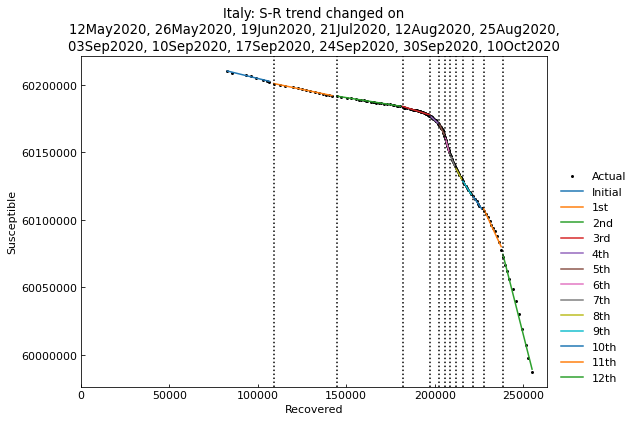

,Type,Start,End,Population
0th,Past,04May2020,11May2020,60421760
1st,Past,12May2020,25May2020,60421760
2nd,Past,26May2020,18Jun2020,60421760
3rd,Past,19Jun2020,20Jul2020,60421760
4th,Past,21Jul2020,11Aug2020,60421760
5th,Past,12Aug2020,24Aug2020,60421760
6th,Past,25Aug2020,02Sep2020,60421760
7th,Past,03Sep2020,09Sep2020,60421760
8th,Past,10Sep2020,16Sep2020,60421760
9th,Past,17Sep2020,23Sep2020,60421760


In [6]:
National_scenario.trend(set_phases=True)
National_scenario.summary()

In [7]:
## Default value of timeout is 180 sec
# snl.estimate(cs.SIRF, timeout=60)
National_scenario.estimate(cs.SIR)
National_scenario.summary()


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	12th phase (26May2020 - 18Jun2020): finished  183 trials in 0 min 10 sec	 4th phase (10Oct2020 - 20Oct2020): finished  178 trials in 0 min 10 sec

	 5th phase (04May2020 - 11May2020): finished  171 trials in 0 min 10 sec
	11th phase (12May2020 - 25May2020): finished  178 trials in 0 min 10 sec
	 8th phase (03Sep2020 - 09Sep2020): finished  159 trials in 0 min 10 sec
	10th phase (17Sep2020 - 23Sep2020): finished  162 trials in 0 min 10 sec
	 1st phase (19Jun2020 - 20Jul2020): finished  166 trials in 0 min 10 sec
	 6th phase (24Sep2020 - 29Sep2020): finished  169 trials in 0 min 10 sec
	 2nd phase (10Sep2020 - 16Sep2020): finished  165 trials in 0 min 10 sec
	 3rd phase (12Aug2020 - 24Aug2020): finished 2028 trials in 3 min  1 sec
	 7th phase (30Sep2020 - 09Oct2020): finished 2022 trials in 3 min  1 sec
	 0th phase (21Jul2020 - 11Aug2020): finished 2210 trials in 3 min  1 sec
	 9th phase (25Aug2020 - 02Sep2020): fini

,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,04May2020,11May2020,60421760,SIR,0.27,0.010722,0.039569,1440,93,25,0.014480,171,0 min 10 sec
1st,Past,12May2020,25May2020,60421760,SIR,0.26,0.010358,0.039812,1440,96,25,0.012862,178,0 min 10 sec
2nd,Past,26May2020,18Jun2020,60421760,SIR,0.20,0.009030,0.045238,1440,110,22,0.014484,183,0 min 10 sec
3rd,Past,19Jun2020,20Jul2020,60421760,SIR,0.37,0.012596,0.034046,1440,79,29,0.030862,166,0 min 10 sec
4th,Past,21Jul2020,11Aug2020,60421760,SIR,1.16,0.023067,0.019886,1440,43,50,0.009621,2210,3 min 1 sec
5th,Past,12Aug2020,24Aug2020,60421760,SIR,2.35,0.039439,0.016814,1440,25,59,0.018933,2028,3 min 1 sec
6th,Past,25Aug2020,02Sep2020,60421760,SIR,4.76,0.058322,0.012254,1440,17,81,0.008634,2280,3 min 1 sec
7th,Past,03Sep2020,09Sep2020,60421760,SIR,3.08,0.047719,0.015490,1440,20,64,0.004235,159,0 min 10 sec
8th,Past,10Sep2020,16Sep2020,60421760,SIR,2.51,0.037236,0.014856,1440,26,67,0.003331,165,0 min 10 sec
9th,Past,17Sep2020,23Sep2020,60421760,SIR,2.10,0.037061,0.017687,1440,26,56,0.003078,162,0 min 10 sec


In [8]:
actual_filename = 'results/Italy_SIR.csv'
National_scenario.summary().to_csv(actual_filename, index = False)

Plot how $\rho$ changes in time.

$\rho$ in our model coincides with $\beta$

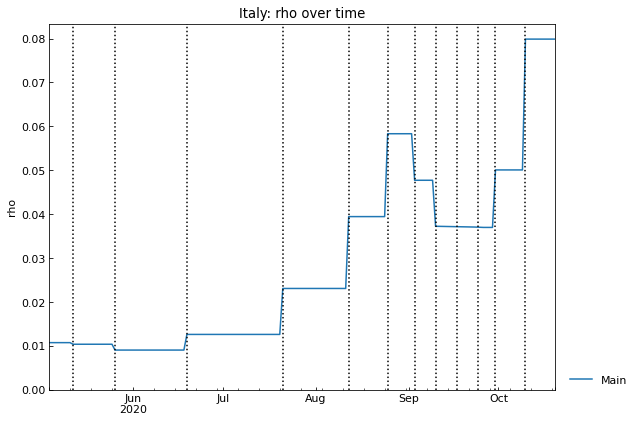

In [9]:
_ = National_scenario.history(target="rho")

# Do the same analysis with provinces

Obtain the list of provinces, and later create a dictionary

In [10]:
data            = pd.read_csv("input/covid19dh.csv", low_memory = False)
data_italy      = data[data.ISO3 == 'ITA'] 
provinces_list  = data_italy.loc[:,"Province/State"].dropna().unique().tolist()

#create an empty dictionary to access the nameof the region given the key and the list of scenarios.
#key equal to zero corresponds to italian data
csv_filenames_SIR  = []
csv_filenames_SIR.append(actual_filename)

scenarios_list_SIR = []
scenarios_list_SIR.append(National_scenario)

province_dict = {}
province_dict.update({0 : "Italy"})

for i, province in enumerate(provinces_list):
    province_dict.update({i+1 : province})
    scenarios_list_SIR.append(cs.Scenario(jhu_data, population_data, country="Italy",
                                      province = province, tau=1440))

Start with the same analysis, and first subset the data by datetime. Later define the phases using S-R comparison

Now dealing with data of:  Friuli Venezia Giulia


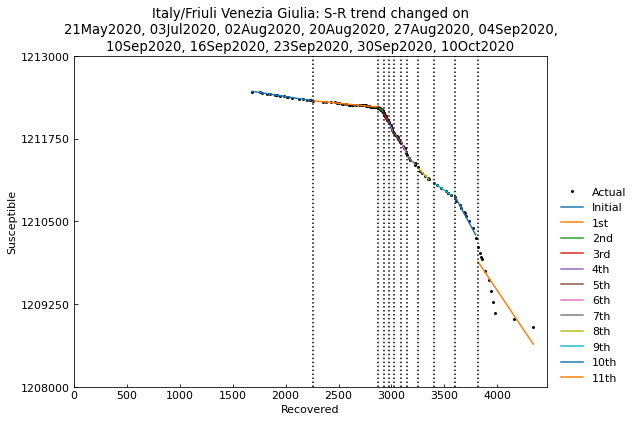


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (23Sep2020 - 29Sep2020): finished  183 trials in 0 min 10 sec
	 4th phase (10Sep2020 - 15Sep2020): finished  186 trials in 0 min 10 sec
	 5th phase (04May2020 - 20May2020): finished  176 trials in 0 min 10 sec
	10th phase (04Sep2020 - 09Sep2020): finished  147 trials in 0 min 10 sec
	 1st phase (27Aug2020 - 03Sep2020): finished  143 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1746 trials in 3 min  1 sec
	11th phase (02Aug2020 - 19Aug2020): finished 1765 trials in 3 min  1 sec
	 8th phase (10Oct2020 - 20Oct2020): finished 1734 trials in 3 min  1 sec
	 2nd phase (21May2020 - 02Jul2020): finished  134 trials in 0 min 10 sec
	 6th phase (16Sep2020 - 22Sep2020): finished 1755 trials in 3 min  1 sec
	 0th phase (03Jul2020 - 01Aug2020): finished 2582 trials in 3 min  0 sec
	 9th phase (20Aug2020 - 26Aug2020): finished 2649 trials in 3 min  0 sec
Completed optimization. Total: 6 min 13 s

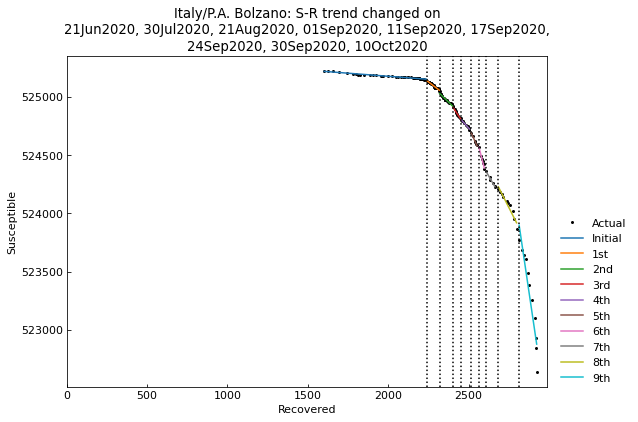


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (21Aug2020 - 31Aug2020): finished 1611 trials in 3 min  1 sec
	 5th phase (10Oct2020 - 20Oct2020): finished 1604 trials in 3 min  1 sec
	 7th phase (30Sep2020 - 09Oct2020): finished 1626 trials in 3 min  1 sec
	 3rd phase (21Jun2020 - 29Jul2020): finished 1602 trials in 3 min  1 sec
	 1st phase (04May2020 - 20Jun2020): finished  115 trials in 0 min 10 sec
	 0th phase (17Sep2020 - 23Sep2020): finished  124 trials in 0 min 10 sec
	 6th phase (01Sep2020 - 10Sep2020): finished 1626 trials in 3 min  1 sec
	 8th phase (11Sep2020 - 16Sep2020): finished 1637 trials in 3 min  1 sec
	 2nd phase (30Jul2020 - 20Aug2020): finished 1632 trials in 3 min  1 sec
	 9th phase (24Sep2020 - 29Sep2020): finished 1841 trials in 3 min  1 sec
Completed optimization. Total: 6 min 24 sec
Now dealing with data of:  Molise


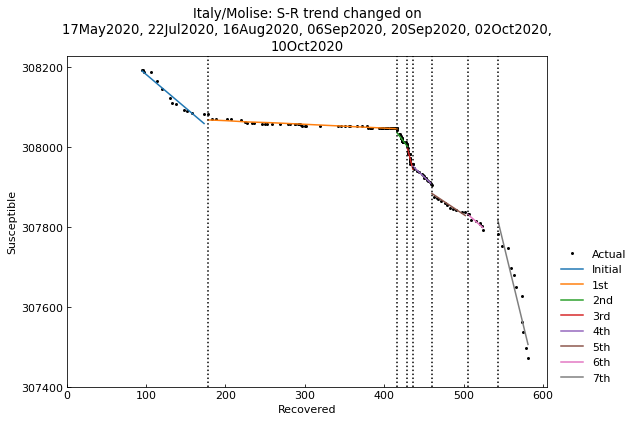


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 3rd phase (06Sep2020 - 19Sep2020): finished  144 trials in 0 min 10 sec
	 5th phase (04May2020 - 16May2020): finished 1809 trials in 3 min  1 sec
	 7th phase (17May2020 - 21Jul2020): finished 2156 trials in 3 min  1 sec
	 4th phase (10Oct2020 - 20Oct2020): finished 1802 trials in 3 min  1 sec
	 1st phase (22Jul2020 - 15Aug2020): finished 1776 trials in 3 min  1 sec
	 6th phase (16Aug2020 - 05Sep2020): finished 2464 trials in 3 min  1 sec
	 0th phase (02Oct2020 - 09Oct2020): finished 2336 trials in 3 min  1 sec
	 2nd phase (20Sep2020 - 01Oct2020): finished 2310 trials in 3 min  1 sec
Completed optimization. Total: 6 min  3 sec
Now dealing with data of:  Campania


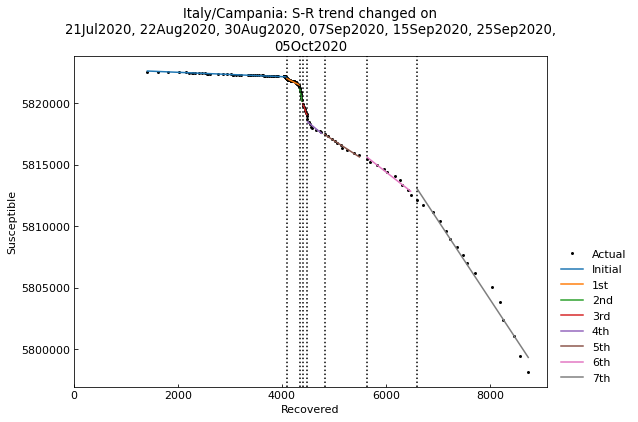


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (22Aug2020 - 29Aug2020): finished  137 trials in 0 min 10 sec
	 7th phase (07Sep2020 - 14Sep2020): finished 1695 trials in 3 min  1 sec
	 4th phase (30Aug2020 - 06Sep2020): finished 1716 trials in 3 min  1 sec
	 3rd phase (05Oct2020 - 20Oct2020): finished 1708 trials in 3 min  1 sec
	 6th phase (15Sep2020 - 24Sep2020): finished  120 trials in 0 min 10 sec
	 1st phase (21Jul2020 - 21Aug2020): finished 1680 trials in 3 min  1 sec
	 2nd phase (25Sep2020 - 04Oct2020): finished 2604 trials in 3 min  1 sec
	 0th phase (04May2020 - 20Jul2020): finished 2588 trials in 3 min  1 sec
Completed optimization. Total: 6 min  4 sec
Now dealing with data of:  Veneto


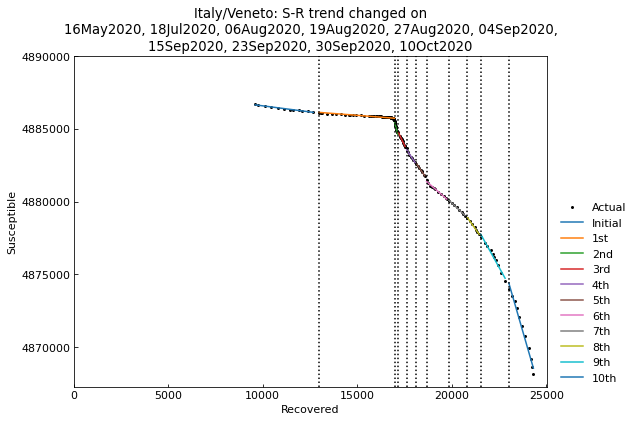


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (23Sep2020 - 29Sep2020): finished  133 trials in 0 min 10 sec
	 5th phase (10Oct2020 - 20Oct2020): finished  130 trials in 0 min 10 sec
	 4th phase (06Aug2020 - 18Aug2020): finished  132 trials in 0 min 10 sec
	 8th phase (27Aug2020 - 03Sep2020): finished  133 trials in 0 min 10 sec
	 1st phase (04May2020 - 15May2020): finished  131 trials in 0 min 10 sec
	 6th phase (16May2020 - 17Jul2020): finished  124 trials in 0 min 10 sec
	 2nd phase (04Sep2020 - 14Sep2020): finished  126 trials in 0 min 10 sec
	 9th phase (15Sep2020 - 22Sep2020): finished  128 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1950 trials in 3 min  1 sec
	10th phase (18Jul2020 - 05Aug2020): finished 2356 trials in 3 min  1 sec
	 0th phase (19Aug2020 - 26Aug2020): finished 2224 trials in 3 min  1 sec
Completed optimization. Total: 3 min 32 sec
Now dealing with data of:  Basilicata


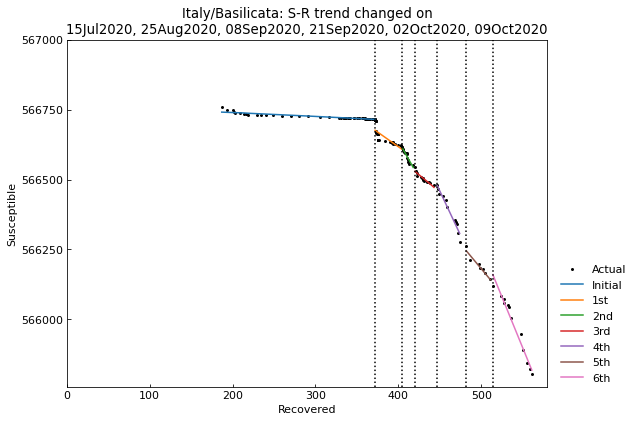


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (04May2020 - 14Jul2020): finished 2188 trials in 3 min  1 sec
	 1st phase (25Aug2020 - 07Sep2020): finished 1828 trials in 3 min  1 sec
	 5th phase (02Oct2020 - 08Oct2020): finished 1838 trials in 3 min  1 sec
	 3rd phase (15Jul2020 - 24Aug2020): finished 1833 trials in 3 min  1 sec
	 0th phase (09Oct2020 - 20Oct2020): finished  148 trials in 0 min 10 sec
	 6th phase (08Sep2020 - 20Sep2020): finished 2847 trials in 3 min  0 sec
	 2nd phase (21Sep2020 - 01Oct2020): finished 2864 trials in 3 min  1 sec
Completed optimization. Total: 6 min  3 sec
Now dealing with data of:  Lazio


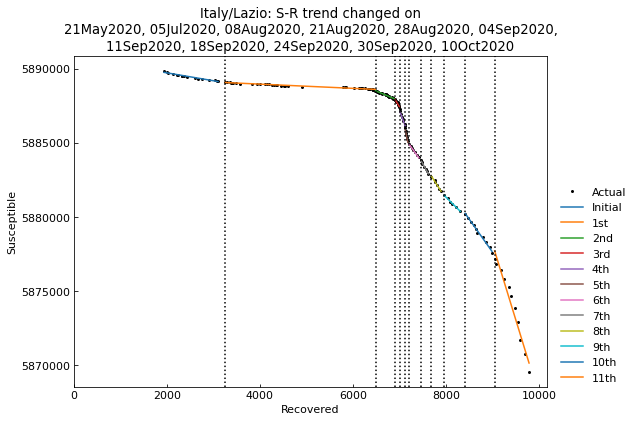


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 3rd phase (30Sep2020 - 09Oct2020): finished  125 trials in 0 min 10 sec
	 7th phase (08Aug2020 - 20Aug2020): finished 1766 trials in 3 min  1 sec
	11th phase (21May2020 - 04Jul2020): finished 1758 trials in 3 min  1 sec
	 4th phase (04May2020 - 20May2020): finished 1760 trials in 3 min  1 sec
	 5th phase (05Jul2020 - 07Aug2020): finished 1771 trials in 3 min  1 sec
	 8th phase (11Sep2020 - 17Sep2020): finished  132 trials in 0 min 10 sec
	10th phase (21Aug2020 - 27Aug2020): finished  129 trials in 0 min 10 sec
	 6th phase (04Sep2020 - 10Sep2020): finished  140 trials in 0 min 10 sec
	 2nd phase (24Sep2020 - 29Sep2020): finished  137 trials in 0 min 10 sec
	 0th phase (28Aug2020 - 03Sep2020): finished  135 trials in 0 min 10 sec
	 9th phase (18Sep2020 - 23Sep2020): finished  238 trials in 0 min 10 sec
	 1st phase (10Oct2020 - 20Oct2020): finished 3118 trials in 3 min  0 sec
Completed optimization. Total: 6 min  3 s

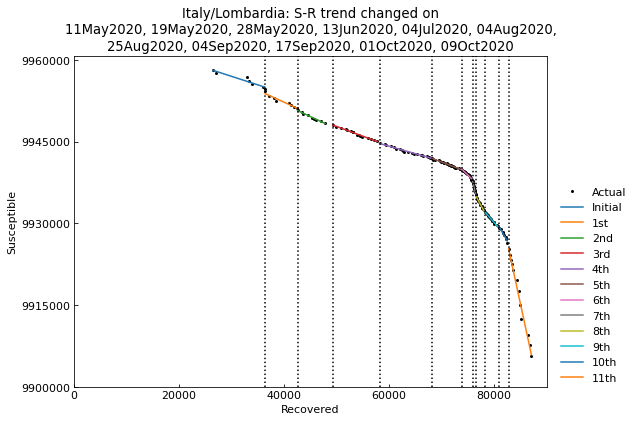


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (11May2020 - 18May2020): finished  151 trials in 0 min 10 sec
	 4th phase (25Aug2020 - 03Sep2020): finished  146 trials in 0 min 10 sec
	 3rd phase (04Jul2020 - 03Aug2020): finished  151 trials in 0 min 10 sec
	11th phase (13Jun2020 - 03Jul2020): finished  149 trials in 0 min 10 sec
	 5th phase (28May2020 - 12Jun2020): finished  141 trials in 0 min 10 sec
	 1st phase (17Sep2020 - 30Sep2020): finished  144 trials in 0 min 10 sec
	 6th phase (09Oct2020 - 20Oct2020): finished  140 trials in 0 min 10 sec
	 2nd phase (04May2020 - 10May2020): finished  140 trials in 0 min 10 sec
	 0th phase (19May2020 - 27May2020): finished  121 trials in 0 min 10 sec
	 9th phase (04Aug2020 - 24Aug2020): finished  120 trials in 0 min 10 sec
	 8th phase (04Sep2020 - 16Sep2020): finished 2724 trials in 3 min  0 sec
	10th phase (01Oct2020 - 08Oct2020): finished 2724 trials in 3 min  0 sec
Completed optimization. Total: 3 min 11 s

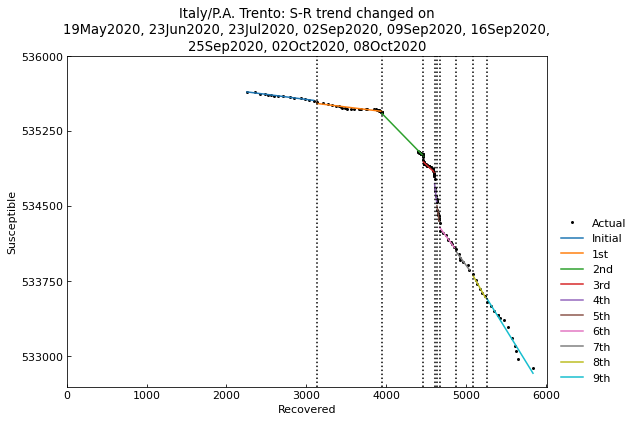


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (19May2020 - 22Jun2020): finished  125 trials in 0 min 10 sec
	 5th phase (02Sep2020 - 08Sep2020): finished 1773 trials in 3 min  1 sec	 3rd phase (23Jun2020 - 22Jul2020): finished 1769 trials in 3 min  1 sec

	 7th phase (09Sep2020 - 15Sep2020): finished 1785 trials in 3 min  1 sec
	 1st phase (02Oct2020 - 07Oct2020): finished  131 trials in 0 min 10 sec
	 2nd phase (16Sep2020 - 24Sep2020): finished  133 trials in 0 min 10 sec
	 8th phase (23Jul2020 - 01Sep2020): finished 1777 trials in 3 min  1 sec
	 9th phase (04May2020 - 18May2020): finished  206 trials in 0 min 10 sec
	 6th phase (25Sep2020 - 01Oct2020): finished 2807 trials in 3 min  0 sec
	 0th phase (08Oct2020 - 20Oct2020): finished 2876 trials in 3 min  0 sec
Completed optimization. Total: 6 min 13 sec
Now dealing with data of:  Piemonte


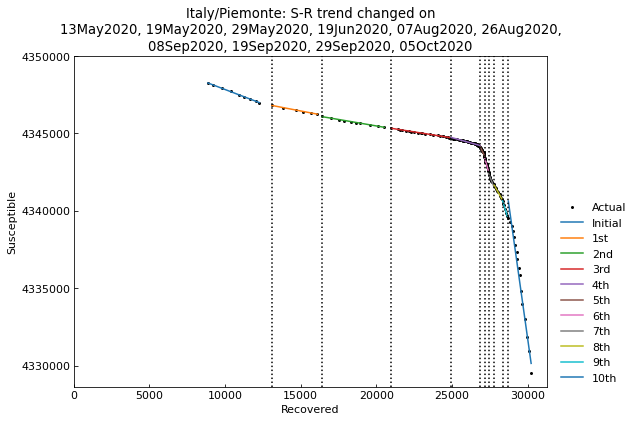


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (19May2020 - 28May2020): finished  146 trials in 0 min 10 sec
	 4th phase (19Jun2020 - 06Aug2020): finished  149 trials in 0 min 10 sec
	 8th phase (19Sep2020 - 28Sep2020): finished  110 trials in 0 min 10 sec
	 1st phase (29Sep2020 - 04Oct2020): finished  121 trials in 0 min 10 sec
	 6th phase (13May2020 - 18May2020): finished  121 trials in 0 min 10 sec
	 3rd phase (05Oct2020 - 20Oct2020): finished 1558 trials in 3 min  1 sec
	 5th phase (26Aug2020 - 07Sep2020): finished 1550 trials in 3 min  1 sec
	10th phase (07Aug2020 - 25Aug2020): finished 1524 trials in 3 min  1 sec
	 0th phase (29May2020 - 18Jun2020): finished  100 trials in 0 min 10 sec
	 9th phase (04May2020 - 12May2020): finished   98 trials in 0 min 10 sec
	 2nd phase (08Sep2020 - 18Sep2020): finished 1798 trials in 3 min  1 sec
Completed optimization. Total: 3 min 43 sec
Now dealing with data of:  Valle d'Aosta


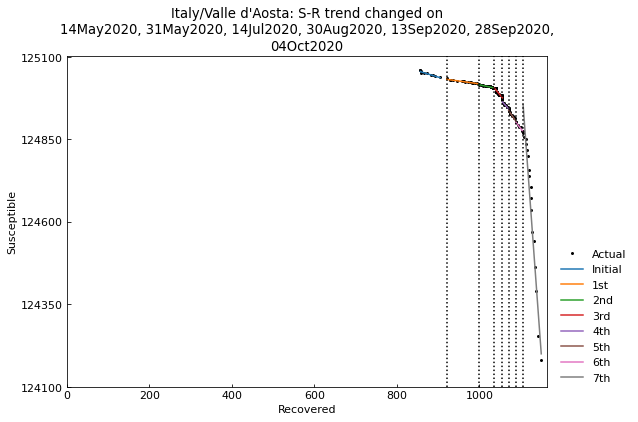


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (13Sep2020 - 27Sep2020): finished   86 trials in 0 min 10 sec
	 1st phase (14May2020 - 30May2020): finished  120 trials in 0 min 10 sec
	 7th phase (04Oct2020 - 20Oct2020): finished 1512 trials in 3 min  1 sec
	 3rd phase (04May2020 - 13May2020): finished 1516 trials in 3 min  1 sec
	 5th phase (14Jul2020 - 29Aug2020): finished 1503 trials in 3 min  1 sec
	 2nd phase (28Sep2020 - 03Oct2020): finished  128 trials in 0 min 10 sec
	 6th phase (31May2020 - 13Jul2020): finished 1925 trials in 3 min  1 sec
	 0th phase (30Aug2020 - 12Sep2020): finished 2890 trials in 3 min  0 sec
Completed optimization. Total: 6 min  3 sec
Now dealing with data of:  Sicilia


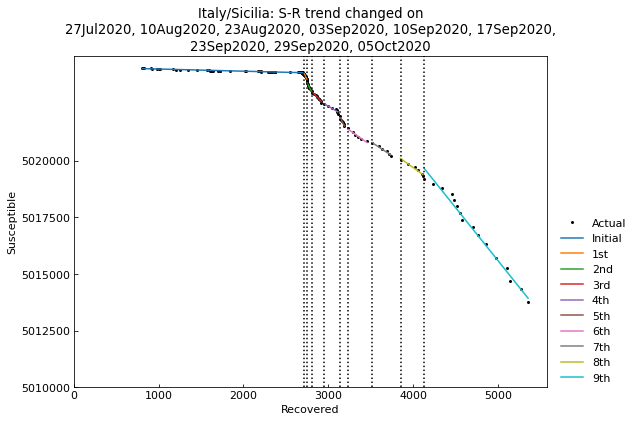


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (29Sep2020 - 04Oct2020): finished  102 trials in 0 min 10 sec
	 5th phase (27Jul2020 - 09Aug2020): finished  114 trials in 0 min 10 sec	 7th phase (23Sep2020 - 28Sep2020): finished  111 trials in 0 min 10 sec

	 8th phase (10Aug2020 - 22Aug2020): finished   93 trials in 0 min 10 sec
	 2nd phase (10Sep2020 - 16Sep2020): finished   93 trials in 0 min 10 sec
	 0th phase (23Aug2020 - 02Sep2020): finished   93 trials in 0 min 10 sec
	 9th phase (17Sep2020 - 22Sep2020): finished  127 trials in 0 min 10 sec
	 3rd phase (05Oct2020 - 20Oct2020): finished 1821 trials in 3 min  1 sec
	 6th phase (03Sep2020 - 09Sep2020): finished 1888 trials in 3 min  1 sec
	 1st phase (04May2020 - 26Jul2020): finished 1920 trials in 3 min  1 sec
Completed optimization. Total: 3 min 12 sec
Now dealing with data of:  Marche


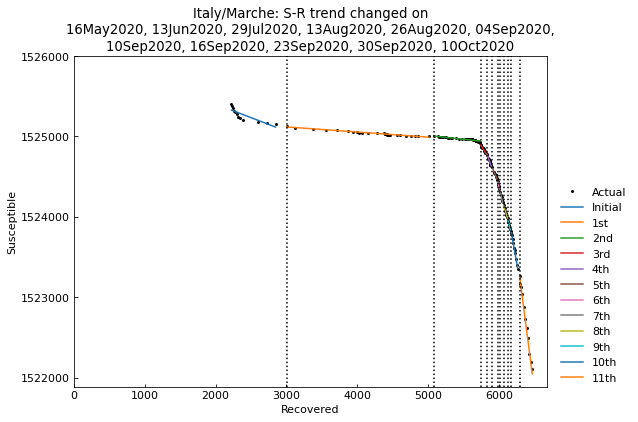


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (23Sep2020 - 29Sep2020): finished  116 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished  117 trials in 0 min 10 sec
	 5th phase (04Sep2020 - 09Sep2020): finished  120 trials in 0 min 10 sec
	10th phase (13Jun2020 - 28Jul2020): finished  113 trials in 0 min 10 sec
	 1st phase (16Sep2020 - 22Sep2020): finished  103 trials in 0 min 10 sec
	 4th phase (10Sep2020 - 15Sep2020): finished 1521 trials in 3 min  1 sec
	11th phase (10Oct2020 - 20Oct2020): finished 1515 trials in 3 min  1 sec
	 8th phase (13Aug2020 - 25Aug2020): finished 1513 trials in 3 min  1 sec
	 2nd phase (16May2020 - 12Jun2020): finished  102 trials in 0 min 10 sec
	 0th phase (26Aug2020 - 03Sep2020): finished  101 trials in 0 min 10 sec
	 9th phase (29Jul2020 - 12Aug2020): finished  200 trials in 0 min 10 sec
	 6th phase (04May2020 - 15May2020): finished 1734 trials in 3 min  1 sec
Completed optimization. Total: 3 min 43 s

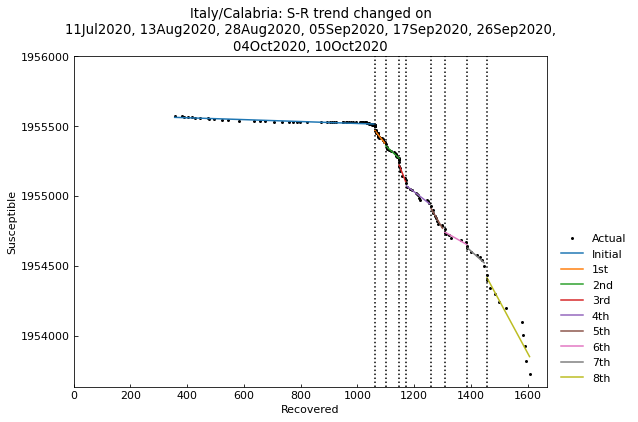


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (13Aug2020 - 27Aug2020): finished 1569 trials in 3 min  1 sec
	 4th phase (10Oct2020 - 20Oct2020): finished 1583 trials in 3 min  1 sec
	 5th phase (04May2020 - 10Jul2020): finished 1525 trials in 3 min  1 sec
	 3rd phase (04Oct2020 - 09Oct2020): finished 1574 trials in 3 min  2 sec
	 8th phase (05Sep2020 - 16Sep2020): finished  205 trials in 0 min 20 sec
	 0th phase (26Sep2020 - 03Oct2020): finished  125 trials in 0 min 10 sec
	 6th phase (28Aug2020 - 04Sep2020): finished 1905 trials in 3 min  1 sec
	 1st phase (11Jul2020 - 12Aug2020): finished 1857 trials in 3 min  1 sec
	 2nd phase (17Sep2020 - 25Sep2020): finished 1788 trials in 3 min  1 sec
Completed optimization. Total: 6 min  4 sec
Now dealing with data of:  Liguria


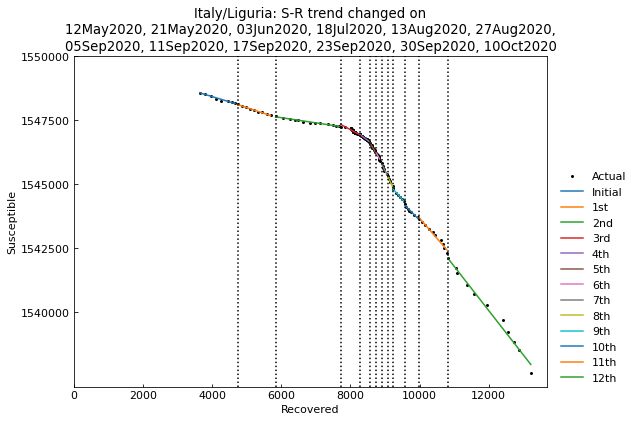


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (13Aug2020 - 26Aug2020): finished  121 trials in 0 min 10 sec
	12th phase (23Sep2020 - 29Sep2020): finished  116 trials in 0 min 10 sec
	 5th phase (21May2020 - 02Jun2020): finished  102 trials in 0 min 10 sec
	11th phase (11Sep2020 - 16Sep2020): finished   98 trials in 0 min 10 sec
	 8th phase (12May2020 - 20May2020): finished   99 trials in 0 min 10 sec
	10th phase (04May2020 - 11May2020): finished   97 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1352 trials in 3 min  2 sec
	 4th phase (10Oct2020 - 20Oct2020): finished 1372 trials in 3 min  2 sec
	 2nd phase (03Jun2020 - 17Jul2020): finished  115 trials in 0 min 10 sec
	 9th phase (17Sep2020 - 22Sep2020): finished  132 trials in 0 min 10 sec
	 1st phase (27Aug2020 - 04Sep2020): finished 1400 trials in 3 min  1 sec
	 6th phase (05Sep2020 - 10Sep2020): finished 1469 trials in 3 min  2 sec
	 0th phase (18Jul2020 - 12Aug2020): fini

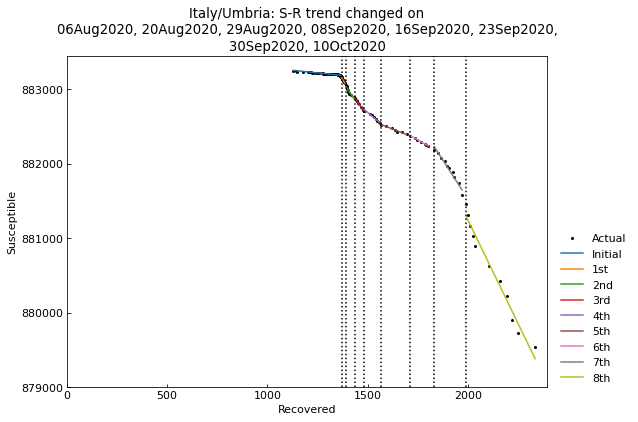


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (08Sep2020 - 15Sep2020): finished  139 trials in 0 min 10 sec
	 7th phase (23Sep2020 - 29Sep2020): finished  140 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1465 trials in 3 min  2 sec
	 5th phase (10Oct2020 - 20Oct2020): finished 1471 trials in 3 min  2 sec
	 1st phase (06Aug2020 - 19Aug2020): finished 1454 trials in 3 min  2 sec
	 8th phase (16Sep2020 - 22Sep2020): finished 1447 trials in 3 min  2 sec
	 6th phase (29Aug2020 - 07Sep2020): finished   97 trials in 0 min 10 sec
	 2nd phase (04May2020 - 05Aug2020): finished 2361 trials in 3 min  0 sec
	 0th phase (20Aug2020 - 28Aug2020): finished 2464 trials in 3 min  0 sec
Completed optimization. Total: 6 min 14 sec
Now dealing with data of:  Emilia-Romagna


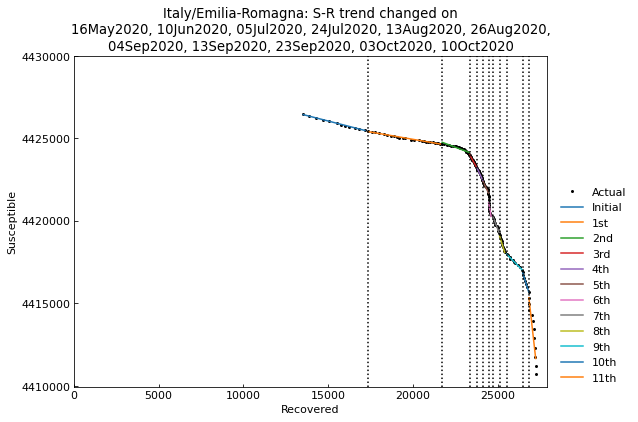


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	11th phase (10Oct2020 - 20Oct2020): finished   93 trials in 0 min 10 sec
	 7th phase (16May2020 - 09Jun2020): finished   98 trials in 0 min 10 sec
	 4th phase (05Jul2020 - 23Jul2020): finished   90 trials in 0 min 10 sec
	 3rd phase (23Sep2020 - 02Oct2020): finished   90 trials in 0 min 10 sec
	 8th phase (04Sep2020 - 12Sep2020): finished  110 trials in 0 min 10 sec
	10th phase (10Jun2020 - 04Jul2020): finished  109 trials in 0 min 10 sec
	 1st phase (04May2020 - 15May2020): finished  108 trials in 0 min 10 sec
	 6th phase (13Sep2020 - 22Sep2020): finished  113 trials in 0 min 10 sec
	 2nd phase (24Jul2020 - 12Aug2020): finished  117 trials in 0 min 10 sec
	 0th phase (03Oct2020 - 09Oct2020): finished  113 trials in 0 min 10 sec
	 5th phase (13Aug2020 - 25Aug2020): finished 2418 trials in 3 min  1 sec
	 9th phase (26Aug2020 - 03Sep2020): finished 2563 trials in 3 min  1 sec
Completed optimization. Total: 3 min 32 s

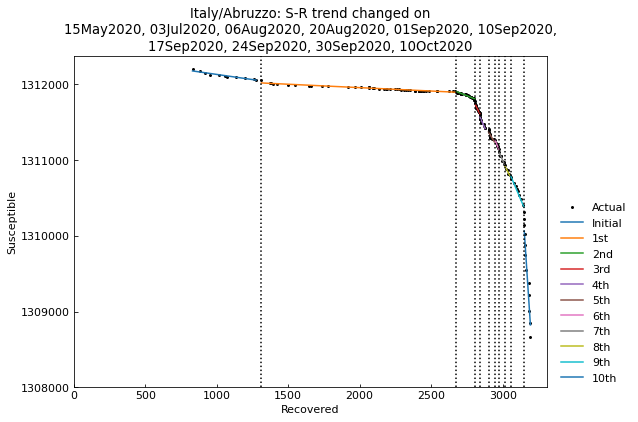


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (04May2020 - 14May2020): finished  116 trials in 0 min 10 sec
	 8th phase (10Oct2020 - 20Oct2020): finished  115 trials in 0 min 10 sec
	 5th phase (20Aug2020 - 31Aug2020): finished 1486 trials in 3 min  1 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1482 trials in 3 min  2 sec
	 4th phase (15May2020 - 02Jul2020): finished 1459 trials in 3 min  2 sec
	 6th phase (17Sep2020 - 23Sep2020): finished  101 trials in 0 min 10 sec
	10th phase (03Jul2020 - 05Aug2020): finished 1463 trials in 3 min  2 sec
	 0th phase (10Sep2020 - 16Sep2020): finished  115 trials in 0 min 10 sec
	 1st phase (06Aug2020 - 19Aug2020): finished 1915 trials in 3 min  1 sec
	 2nd phase (24Sep2020 - 29Sep2020): finished 1852 trials in 3 min  1 sec
	 9th phase (01Sep2020 - 09Sep2020): finished 2080 trials in 3 min  1 sec
Completed optimization. Total: 6 min 24 sec
Now dealing with data of:  Puglia


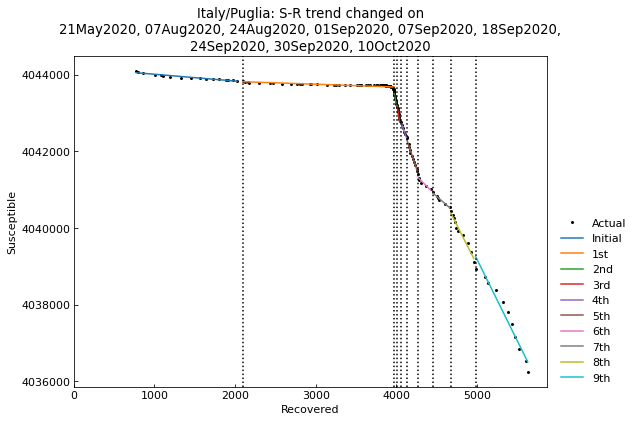


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (07Sep2020 - 17Sep2020): finished  135 trials in 0 min 10 sec
	 8th phase (01Sep2020 - 06Sep2020): finished  122 trials in 0 min 10 sec
	 1st phase (04May2020 - 20May2020): finished  107 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1545 trials in 3 min  1 sec
	 5th phase (24Aug2020 - 31Aug2020): finished 1574 trials in 3 min  1 sec
	 7th phase (07Aug2020 - 23Aug2020): finished 1575 trials in 3 min  1 sec
	 2nd phase (21May2020 - 06Aug2020): finished  110 trials in 0 min 10 sec
	 0th phase (24Sep2020 - 29Sep2020): finished  103 trials in 0 min 10 sec
	 9th phase (18Sep2020 - 23Sep2020): finished  109 trials in 0 min 10 sec
	 6th phase (10Oct2020 - 20Oct2020): finished 1763 trials in 3 min  1 sec
Completed optimization. Total: 3 min 32 sec
Now dealing with data of:  Toscana


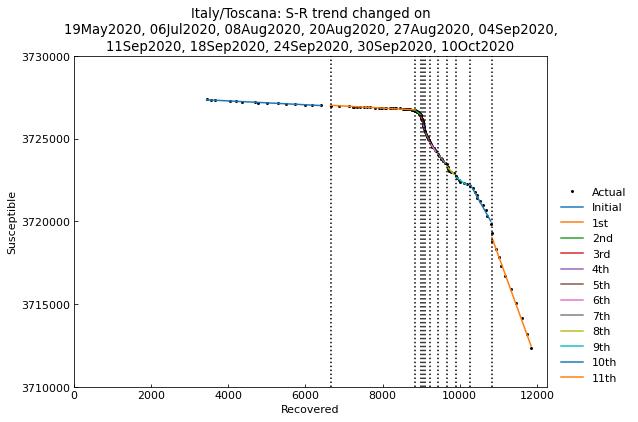


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	11th phase (11Sep2020 - 17Sep2020): finished  110 trials in 0 min 10 sec
	 4th phase (10Oct2020 - 20Oct2020): finished  114 trials in 0 min 10 sec
	 7th phase (08Aug2020 - 19Aug2020): finished  116 trials in 0 min 10 sec
	 5th phase (27Aug2020 - 03Sep2020): finished  102 trials in 0 min 10 sec
	 8th phase (19May2020 - 05Jul2020): finished   99 trials in 0 min 10 sec
	10th phase (04Sep2020 - 10Sep2020): finished  103 trials in 0 min 10 sec
	 2nd phase (24Sep2020 - 29Sep2020): finished  106 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1663 trials in 3 min  1 sec
	 1st phase (06Jul2020 - 07Aug2020): finished 1733 trials in 3 min  1 sec
	 6th phase (20Aug2020 - 26Aug2020): finished 1728 trials in 3 min  1 sec
	 0th phase (18Sep2020 - 23Sep2020): finished 1797 trials in 3 min  1 sec
	 9th phase (04May2020 - 18May2020): finished 3146 trials in 3 min  0 sec
Completed optimization. Total: 6 min  3 s

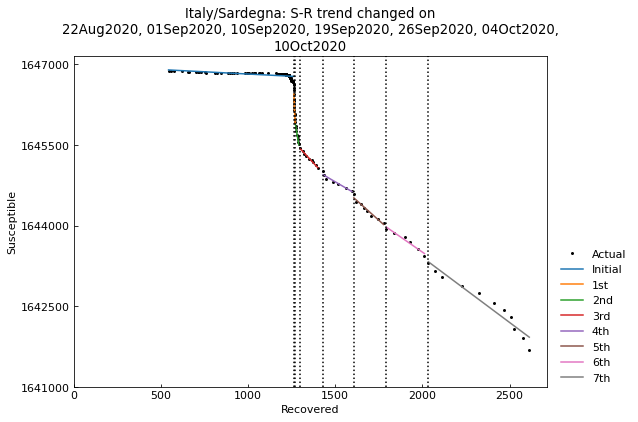


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (10Sep2020 - 18Sep2020): finished  121 trials in 0 min 10 sec
	 4th phase (04Oct2020 - 09Oct2020): finished  122 trials in 0 min 10 sec
	 1st phase (19Sep2020 - 25Sep2020): finished  117 trials in 0 min 10 sec
	 6th phase (04May2020 - 21Aug2020): finished  108 trials in 0 min 10 sec
	 0th phase (26Sep2020 - 03Oct2020): finished  424 trials in 0 min 40 sec
	 5th phase (10Oct2020 - 20Oct2020): finished 1844 trials in 3 min  1 sec
	 3rd phase (22Aug2020 - 31Aug2020): finished 1895 trials in 3 min  1 sec
	 2nd phase (01Sep2020 - 09Sep2020): finished 1959 trials in 3 min  1 sec
Completed optimization. Total: 3 min 22 sec


In [12]:
#skip the number "0" that is italy
for i, scenario in enumerate(scenarios_list_SIR[1:]):
    #index that can access the dictionary for the regions is shifted by 1
    index = i + 1
    actual_province = province_dict.get(index)
    print("\nNow dealing with data of: ", actual_province)
    print("Step: ", index, "/", len(scenarios_list_SIR))
    
    # Fix the first date of records
    scenario.first_date = "04May2020"
    # Fix the last date of records
    scenario.last_date = "20Oct2020"
    scenario.trend(set_phases=True)
    scenario.estimate(cs.SIR)
    
    actual_filename = 'results/'+actual_province+'_SIR.csv'
    csv_filenames_SIR.append(actual_filename)
    scenario.summary().to_csv(actual_filename, index = False)

# Fit using SIR-D model

In [13]:
#instantiate scenario for National SIR-D model
National_scenario_SIRD = cs.Scenario(jhu_data, population_data, country="Italy", province= None, tau=1440)

csv_filenames_SIRD  = []
scenarios_list_SIRD = []
scenarios_list_SIRD.append(National_scenario_SIRD)

for province in provinces_list:
    scenarios_list_SIRD.append(cs.Scenario(jhu_data, population_data, country="Italy",
                                      province = province, tau=1440))

Now dealing with data of:  Italy


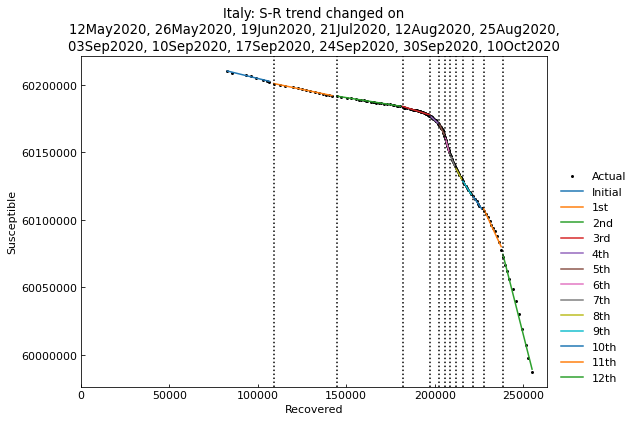


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	12th phase (26May2020 - 18Jun2020): finished  101 trials in 0 min 10 sec
	 4th phase (10Oct2020 - 20Oct2020): finished  101 trials in 0 min 11 sec
	11th phase (12May2020 - 25May2020): finished  101 trials in 0 min 10 sec
	 5th phase (04May2020 - 11May2020): finished  103 trials in 0 min 10 sec
	 8th phase (03Sep2020 - 09Sep2020): finished  106 trials in 0 min 10 sec
	10th phase (17Sep2020 - 23Sep2020): finished  106 trials in 0 min 10 sec
	 1st phase (19Jun2020 - 20Jul2020): finished  104 trials in 0 min 10 sec
	 6th phase (24Sep2020 - 29Sep2020): finished  106 trials in 0 min 10 sec
	 2nd phase (10Sep2020 - 16Sep2020): finished  110 trials in 0 min 10 sec
	 7th phase (30Sep2020 - 09Oct2020): finished 1447 trials in 3 min  2 sec
	 3rd phase (12Aug2020 - 24Aug2020): finished 1464 trials in 3 min  2 sec
	 0th phase (21Jul2020 - 11Aug2020): finished 1724 trials in 3 min  1 sec
	 9th phase (25Aug2020 - 02Sep2020): fi

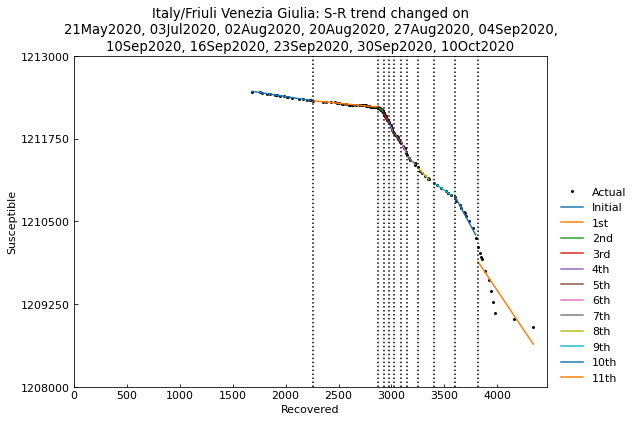


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (10Sep2020 - 15Sep2020): finished  131 trials in 0 min 10 sec
	 7th phase (23Sep2020 - 29Sep2020): finished  139 trials in 0 min 10 sec
	 5th phase (04May2020 - 20May2020): finished  113 trials in 0 min 10 sec
	10th phase (04Sep2020 - 09Sep2020): finished  127 trials in 0 min 10 sec
	 1st phase (27Aug2020 - 03Sep2020): finished  127 trials in 0 min 10 sec
	11th phase (02Aug2020 - 19Aug2020): finished 1755 trials in 3 min  1 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1766 trials in 3 min  1 sec
	 2nd phase (21May2020 - 02Jul2020): finished  118 trials in 0 min 10 sec
	 8th phase (10Oct2020 - 20Oct2020): finished 1522 trials in 3 min  1 sec
	 6th phase (16Sep2020 - 22Sep2020): finished 1919 trials in 3 min  1 sec
	 0th phase (03Jul2020 - 01Aug2020): finished 2669 trials in 3 min  0 sec
	 9th phase (20Aug2020 - 26Aug2020): finished 2745 trials in 3 min  0 sec
Completed optimization. Total: 6 min 13

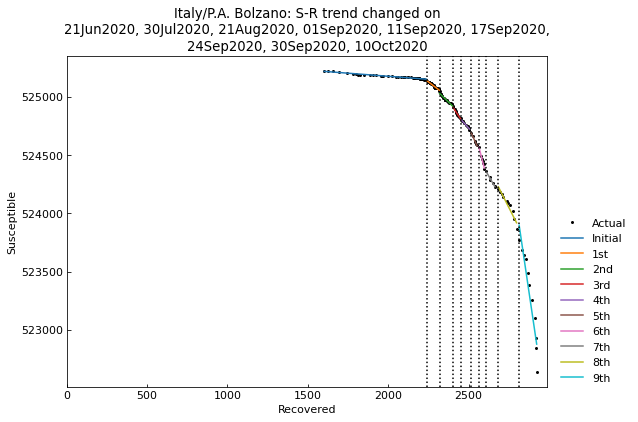


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (30Sep2020 - 09Oct2020): finished 1795 trials in 3 min  1 sec
	 5th phase (10Oct2020 - 20Oct2020): finished 1528 trials in 3 min  1 sec

	 3rd phase (21Jun2020 - 29Jul2020): finished 1754 trials in 3 min  1 sec	 4th phase (21Aug2020 - 31Aug2020): finished 1747 trials in 3 min  1 sec
	 8th phase (11Sep2020 - 16Sep2020): finished 1758 trials in 3 min  1 sec
	 1st phase (04May2020 - 20Jun2020): finished 1735 trials in 3 min  1 sec
	 2nd phase (30Jul2020 - 20Aug2020): finished 1804 trials in 3 min  1 sec
	 6th phase (01Sep2020 - 10Sep2020): finished 1809 trials in 3 min  1 sec
	 0th phase (17Sep2020 - 23Sep2020): finished  232 trials in 0 min 10 sec
	 9th phase (24Sep2020 - 29Sep2020): finished 3108 trials in 3 min  0 sec
Completed optimization. Total: 9 min  5 sec
Now dealing with data of:  Molise


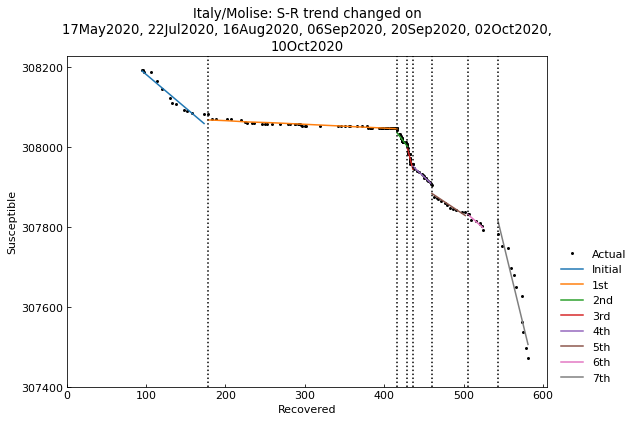


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 3rd phase (06Sep2020 - 19Sep2020): finished  111 trials in 0 min 10 sec
	 7th phase (17May2020 - 21Jul2020): finished 1834 trials in 3 min  1 sec
	 4th phase (10Oct2020 - 20Oct2020): finished 1556 trials in 3 min  1 sec
	 5th phase (04May2020 - 16May2020): finished 1523 trials in 3 min  1 sec
	 1st phase (22Jul2020 - 15Aug2020): finished 1563 trials in 3 min  1 sec
	 6th phase (16Aug2020 - 05Sep2020): finished 2343 trials in 3 min  1 sec
	 2nd phase (20Sep2020 - 01Oct2020): finished 1932 trials in 3 min  1 sec
	 0th phase (02Oct2020 - 09Oct2020): finished 1980 trials in 3 min  1 sec
Completed optimization. Total: 6 min  5 sec
Now dealing with data of:  Campania


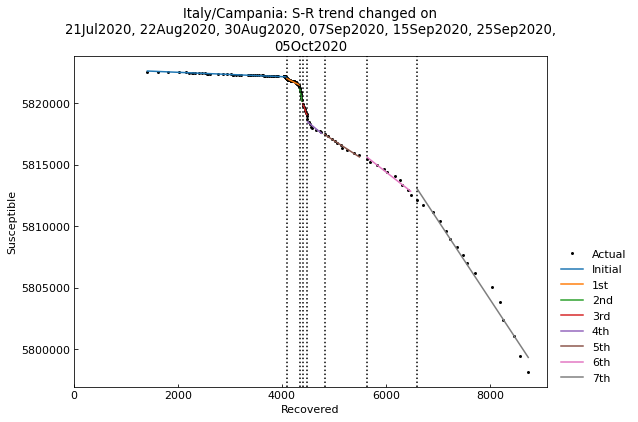


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (22Aug2020 - 29Aug2020): finished   99 trials in 0 min 10 sec
	 7th phase (07Sep2020 - 14Sep2020): finished 1349 trials in 3 min  1 sec
	 3rd phase (05Oct2020 - 20Oct2020): finished 1329 trials in 3 min  1 sec
	 4th phase (30Aug2020 - 06Sep2020): finished 1354 trials in 3 min  1 sec
	 6th phase (15Sep2020 - 24Sep2020): finished  100 trials in 0 min 10 sec
	 1st phase (21Jul2020 - 21Aug2020): finished 1520 trials in 3 min  1 sec
	 2nd phase (25Sep2020 - 04Oct2020): finished 2134 trials in 3 min  1 sec
	 0th phase (04May2020 - 20Jul2020): finished 2133 trials in 3 min  1 sec
Completed optimization. Total: 6 min  4 sec
Now dealing with data of:  Veneto


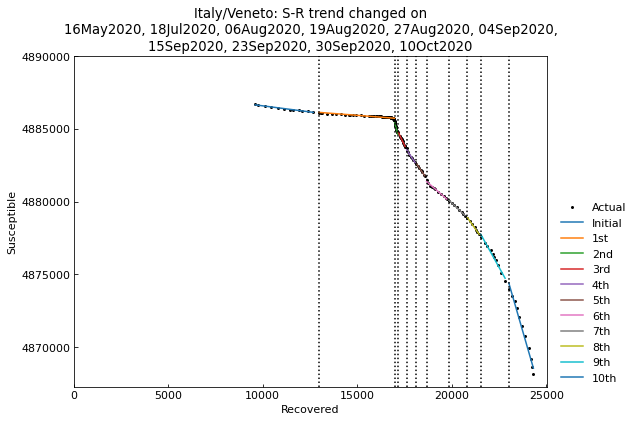


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (10Oct2020 - 20Oct2020): finished  111 trials in 0 min 10 sec
	 7th phase (23Sep2020 - 29Sep2020): finished  110 trials in 0 min 10 sec
	 4th phase (06Aug2020 - 18Aug2020): finished  109 trials in 0 min 10 sec
	 1st phase (04May2020 - 15May2020): finished  108 trials in 0 min 10 sec
	 8th phase (27Aug2020 - 03Sep2020): finished  108 trials in 0 min 10 sec
	 6th phase (16May2020 - 17Jul2020): finished   88 trials in 0 min 10 sec
	 2nd phase (04Sep2020 - 14Sep2020): finished   89 trials in 0 min 10 sec
	 9th phase (15Sep2020 - 22Sep2020): finished  105 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1569 trials in 3 min  1 sec
	10th phase (18Jul2020 - 05Aug2020): finished 1640 trials in 3 min  1 sec
	 0th phase (19Aug2020 - 26Aug2020): finished 1846 trials in 3 min  1 sec
Completed optimization. Total: 3 min 32 sec
Now dealing with data of:  Basilicata


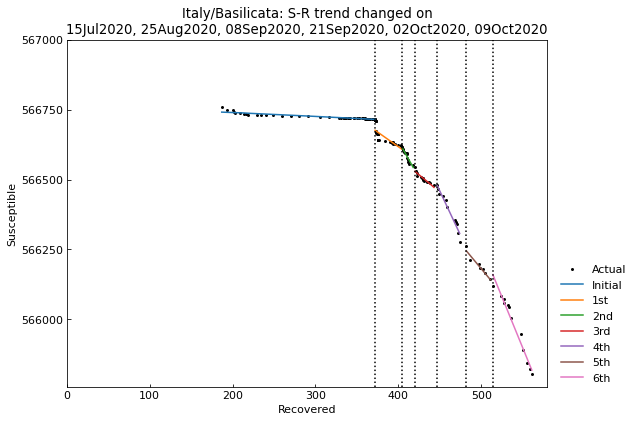


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 1st phase (25Aug2020 - 07Sep2020): finished 1760 trials in 3 min  1 sec
	 4th phase (04May2020 - 14Jul2020): finished 2072 trials in 3 min  1 sec
	 3rd phase (15Jul2020 - 24Aug2020): finished 1765 trials in 3 min  1 sec
	 5th phase (02Oct2020 - 08Oct2020): finished 1511 trials in 3 min  1 sec
	 0th phase (09Oct2020 - 20Oct2020): finished 2247 trials in 3 min  1 sec
	 6th phase (08Sep2020 - 20Sep2020): finished 2074 trials in 3 min  1 sec
	 2nd phase (21Sep2020 - 01Oct2020): finished 2184 trials in 3 min  1 sec
Completed optimization. Total: 6 min  4 sec
Now dealing with data of:  Lazio


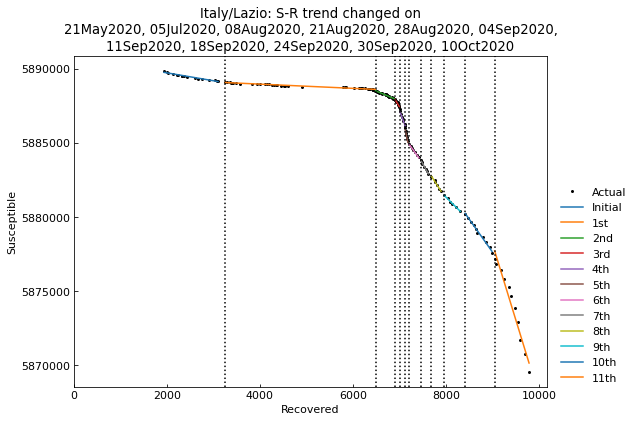


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 3rd phase (30Sep2020 - 09Oct2020): finished   88 trials in 0 min 10 sec
	11th phase (21May2020 - 04Jul2020): finished 1383 trials in 3 min  1 sec
	 7th phase (08Aug2020 - 20Aug2020): finished 1384 trials in 3 min  1 sec
	 4th phase (04May2020 - 20May2020): finished 1365 trials in 3 min  1 sec
	 8th phase (11Sep2020 - 17Sep2020): finished  119 trials in 0 min 10 sec
	 5th phase (05Jul2020 - 07Aug2020): finished 1357 trials in 3 min  1 sec
	10th phase (21Aug2020 - 27Aug2020): finished  121 trials in 0 min 10 sec
	 6th phase (04Sep2020 - 10Sep2020): finished  107 trials in 0 min 10 sec
	 2nd phase (24Sep2020 - 29Sep2020): finished  109 trials in 0 min 10 sec
	 0th phase (28Aug2020 - 03Sep2020): finished  117 trials in 0 min 10 sec
	 9th phase (18Sep2020 - 23Sep2020): finished  166 trials in 0 min 10 sec
	 1st phase (10Oct2020 - 20Oct2020): finished 2472 trials in 3 min  1 sec
Completed optimization. Total: 6 min  4

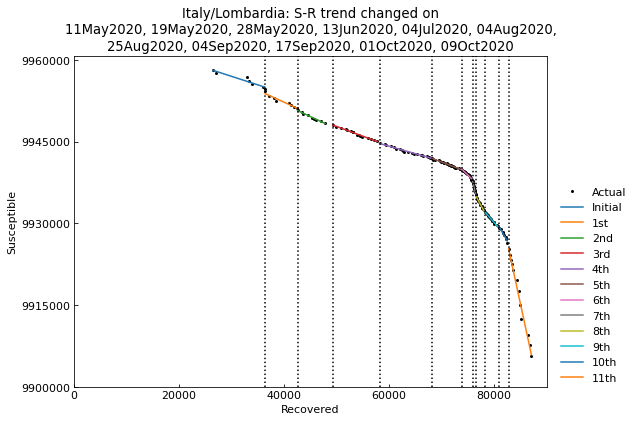


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (25Aug2020 - 03Sep2020): finished  126 trials in 0 min 10 sec	 3rd phase (04Jul2020 - 03Aug2020): finished  120 trials in 0 min 10 sec

	11th phase (13Jun2020 - 03Jul2020): finished  117 trials in 0 min 10 sec
	 5th phase (28May2020 - 12Jun2020): finished  122 trials in 0 min 10 sec
	 1st phase (17Sep2020 - 30Sep2020): finished  110 trials in 0 min 10 sec
	 6th phase (09Oct2020 - 20Oct2020): finished   95 trials in 0 min 10 sec
	 7th phase (11May2020 - 18May2020): finished 1493 trials in 3 min  1 sec
	10th phase (01Oct2020 - 08Oct2020): finished 1500 trials in 3 min  1 sec
	 8th phase (04Sep2020 - 16Sep2020): finished 1506 trials in 3 min  1 sec
	 0th phase (19May2020 - 27May2020): finished  119 trials in 0 min 10 sec
	 9th phase (04Aug2020 - 24Aug2020): finished  211 trials in 0 min 10 sec
	 2nd phase (04May2020 - 10May2020): finished 1724 trials in 3 min  1 sec
Completed optimization. Total: 3 min 42

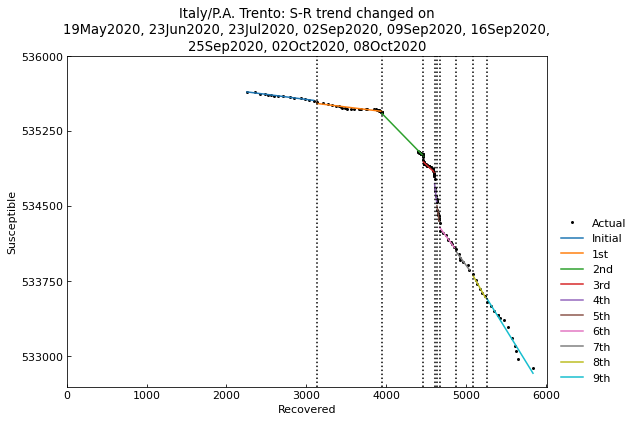


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (09Sep2020 - 15Sep2020): finished 1850 trials in 3 min  1 sec
	 5th phase (02Sep2020 - 08Sep2020): finished 1825 trials in 3 min  1 sec
	 4th phase (19May2020 - 22Jun2020): finished 1807 trials in 3 min  1 sec
	 3rd phase (23Jun2020 - 22Jul2020): finished 1819 trials in 3 min  1 sec
	 1st phase (02Oct2020 - 07Oct2020): finished  128 trials in 0 min 10 sec
	 2nd phase (16Sep2020 - 24Sep2020): finished  129 trials in 0 min 10 sec
	 9th phase (04May2020 - 18May2020): finished  119 trials in 0 min 10 sec
	 8th phase (23Jul2020 - 01Sep2020): finished 2318 trials in 3 min  1 sec
	 6th phase (25Sep2020 - 01Oct2020): finished 2181 trials in 3 min  1 sec
	 0th phase (08Oct2020 - 20Oct2020): finished 1738 trials in 3 min  1 sec
Completed optimization. Total: 6 min 13 sec
Now dealing with data of:  Piemonte


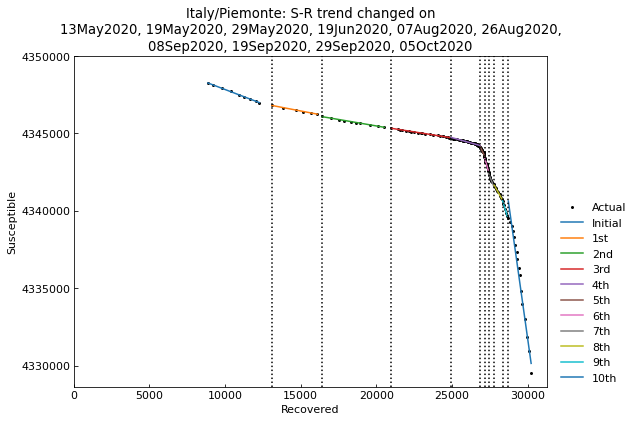


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (19Jun2020 - 06Aug2020): finished  120 trials in 0 min 10 sec	 7th phase (19May2020 - 28May2020): finished  122 trials in 0 min 10 sec

	 8th phase (19Sep2020 - 28Sep2020): finished  120 trials in 0 min 10 sec
	 1st phase (29Sep2020 - 04Oct2020): finished  116 trials in 0 min 10 sec
	 6th phase (13May2020 - 18May2020): finished  113 trials in 0 min 10 sec
	 3rd phase (05Oct2020 - 20Oct2020): finished 1567 trials in 3 min  1 sec
	 5th phase (26Aug2020 - 07Sep2020): finished 1560 trials in 3 min  1 sec
	10th phase (07Aug2020 - 25Aug2020): finished 1571 trials in 3 min  1 sec
	 0th phase (29May2020 - 18Jun2020): finished  129 trials in 0 min 10 sec
	 9th phase (04May2020 - 12May2020): finished  128 trials in 0 min 10 sec
	 2nd phase (08Sep2020 - 18Sep2020): finished 2100 trials in 3 min  1 sec
Completed optimization. Total: 3 min 42 sec
Now dealing with data of:  Valle d'Aosta


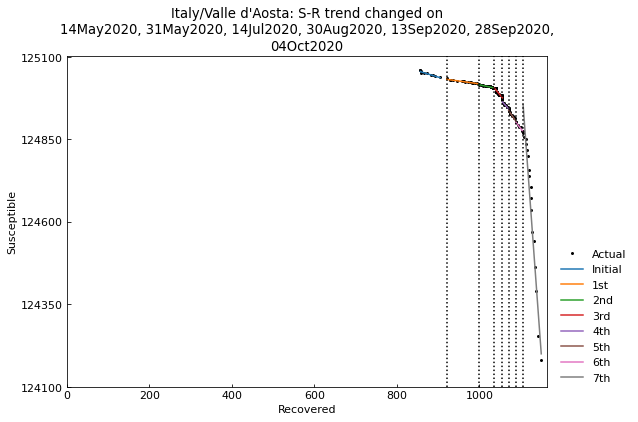


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (13Sep2020 - 27Sep2020): finished  147 trials in 0 min 10 sec
	 1st phase (14May2020 - 30May2020): finished  130 trials in 0 min 10 sec
	 5th phase (14Jul2020 - 29Aug2020): finished 1783 trials in 3 min  1 sec
	 7th phase (04Oct2020 - 20Oct2020): finished 1787 trials in 3 min  1 sec
	 3rd phase (04May2020 - 13May2020): finished 1798 trials in 3 min  1 sec
	 2nd phase (28Sep2020 - 03Oct2020): finished  144 trials in 0 min 10 sec
	 6th phase (31May2020 - 13Jul2020): finished 2316 trials in 3 min  1 sec
	 0th phase (30Aug2020 - 12Sep2020): finished 3240 trials in 3 min  0 sec
Completed optimization. Total: 6 min  3 sec
Now dealing with data of:  Sicilia


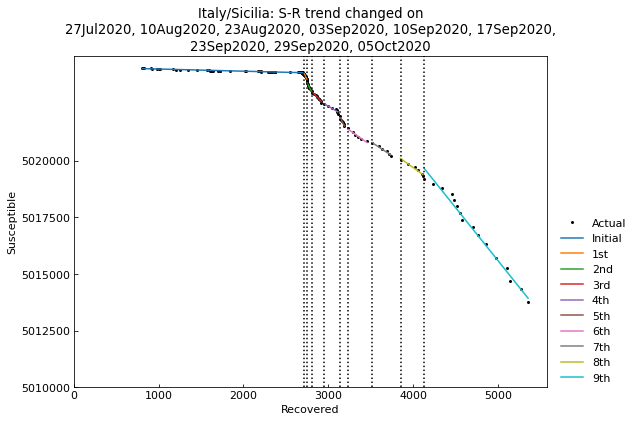


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (23Sep2020 - 28Sep2020): finished  127 trials in 0 min 10 sec
	 4th phase (29Sep2020 - 04Oct2020): finished  127 trials in 0 min 10 sec
	 5th phase (27Jul2020 - 09Aug2020): finished  139 trials in 0 min 10 sec
	 8th phase (10Aug2020 - 22Aug2020): finished  140 trials in 0 min 10 sec
	 2nd phase (10Sep2020 - 16Sep2020): finished  128 trials in 0 min 10 sec
	 0th phase (23Aug2020 - 02Sep2020): finished  141 trials in 0 min 10 sec
	 9th phase (17Sep2020 - 22Sep2020): finished  119 trials in 0 min 10 sec
	 3rd phase (05Oct2020 - 20Oct2020): finished 1762 trials in 3 min  1 sec
	 6th phase (03Sep2020 - 09Sep2020): finished 1965 trials in 3 min  1 sec
	 1st phase (04May2020 - 26Jul2020): finished 1730 trials in 3 min  1 sec
Completed optimization. Total: 3 min 12 sec
Now dealing with data of:  Marche


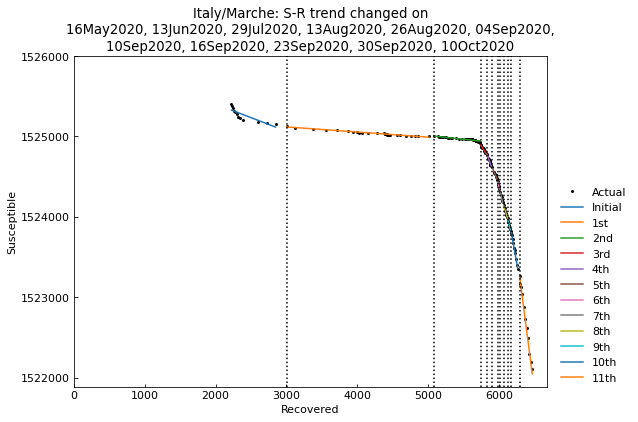


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (23Sep2020 - 29Sep2020): finished  114 trials in 0 min 10 sec	 3rd phase (30Sep2020 - 09Oct2020): finished  110 trials in 0 min 10 sec

	 5th phase (04Sep2020 - 09Sep2020): finished  101 trials in 0 min 10 sec
	10th phase (13Jun2020 - 28Jul2020): finished   94 trials in 0 min 10 sec
	 1st phase (16Sep2020 - 22Sep2020): finished   76 trials in 0 min 10 sec
	 4th phase (10Sep2020 - 15Sep2020): finished 1481 trials in 3 min  1 sec
	11th phase (10Oct2020 - 20Oct2020): finished 1472 trials in 3 min  2 sec
	 2nd phase (16May2020 - 12Jun2020): finished  105 trials in 0 min 10 sec
	 8th phase (13Aug2020 - 25Aug2020): finished 1474 trials in 3 min  1 sec
	 0th phase (26Aug2020 - 03Sep2020): finished  115 trials in 0 min 10 sec
	 9th phase (29Jul2020 - 12Aug2020): finished  192 trials in 0 min 10 sec
	 6th phase (04May2020 - 15May2020): finished 1537 trials in 3 min  1 sec
Completed optimization. Total: 3 min 43

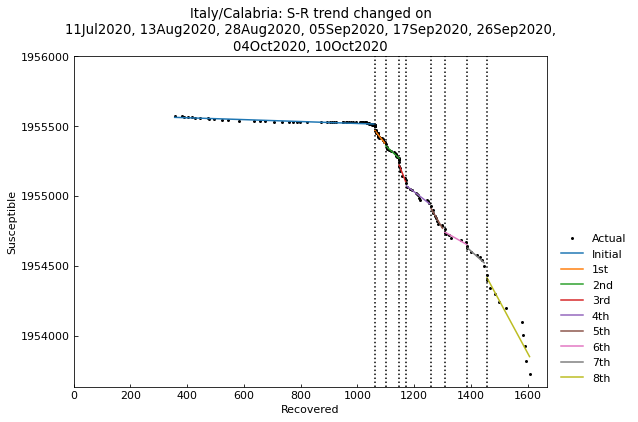


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 3rd phase (04Oct2020 - 09Oct2020): finished 1314 trials in 3 min  1 sec
	 5th phase (04May2020 - 10Jul2020): finished 1487 trials in 3 min  1 sec
	 7th phase (13Aug2020 - 27Aug2020): finished 1510 trials in 3 min  1 sec
	 4th phase (10Oct2020 - 20Oct2020): finished 1523 trials in 3 min  1 sec
	 8th phase (05Sep2020 - 16Sep2020): finished  226 trials in 0 min 20 sec
	 0th phase (26Sep2020 - 03Oct2020): finished  101 trials in 0 min 10 sec
	 6th phase (28Aug2020 - 04Sep2020): finished 2191 trials in 3 min  0 sec
	 1st phase (11Jul2020 - 12Aug2020): finished 2158 trials in 3 min  1 sec
	 2nd phase (17Sep2020 - 25Sep2020): finished 1956 trials in 3 min  1 sec
Completed optimization. Total: 6 min  4 sec
Now dealing with data of:  Liguria


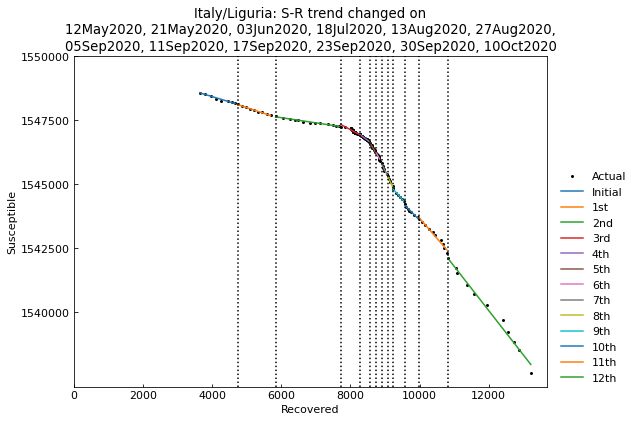


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	12th phase (23Sep2020 - 29Sep2020): finished  126 trials in 0 min 10 sec
	 7th phase (13Aug2020 - 26Aug2020): finished  134 trials in 0 min 10 sec
	 5th phase (21May2020 - 02Jun2020): finished  113 trials in 0 min 10 sec
	11th phase (11Sep2020 - 16Sep2020): finished  115 trials in 0 min 10 sec
	10th phase (04May2020 - 11May2020): finished  109 trials in 0 min 10 sec
	 8th phase (12May2020 - 20May2020): finished  106 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1514 trials in 3 min  1 sec
	 4th phase (10Oct2020 - 20Oct2020): finished 1521 trials in 3 min  1 sec
	 1st phase (27Aug2020 - 04Sep2020): finished 1750 trials in 3 min  1 sec
	 6th phase (05Sep2020 - 10Sep2020): finished 1520 trials in 3 min  1 sec
	 9th phase (17Sep2020 - 22Sep2020): finished  124 trials in 0 min 10 sec
	 2nd phase (03Jun2020 - 17Jul2020): finished 2063 trials in 3 min  1 sec
	 0th phase (18Jul2020 - 12Aug2020): fi

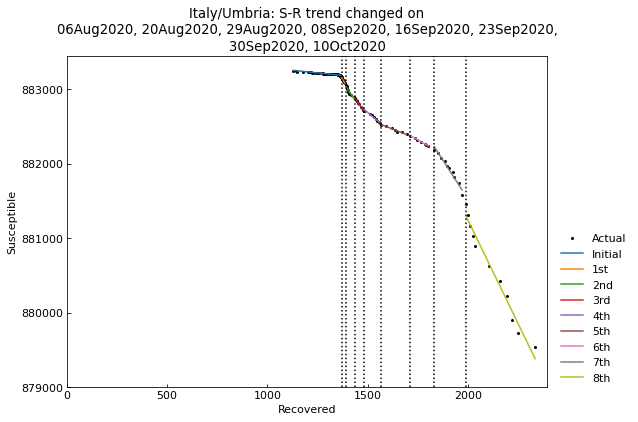


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (08Sep2020 - 15Sep2020): finished  112 trials in 0 min 10 sec	 7th phase (23Sep2020 - 29Sep2020): finished  120 trials in 0 min 10 sec

	 5th phase (10Oct2020 - 20Oct2020): finished 1285 trials in 3 min  1 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1485 trials in 3 min  1 sec
	 6th phase (29Aug2020 - 07Sep2020): finished   90 trials in 0 min 10 sec
	 8th phase (16Sep2020 - 22Sep2020): finished 1271 trials in 3 min  2 sec
	 1st phase (06Aug2020 - 19Aug2020): finished 1454 trials in 3 min  1 sec
	 2nd phase (04May2020 - 05Aug2020): finished 2575 trials in 3 min  1 sec
	 0th phase (20Aug2020 - 28Aug2020): finished 2656 trials in 3 min  0 sec
Completed optimization. Total: 6 min 15 sec
Now dealing with data of:  Emilia-Romagna


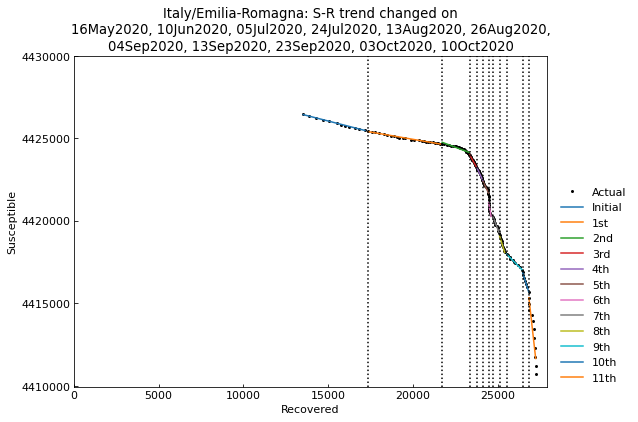


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 3rd phase (23Sep2020 - 02Oct2020): finished  111 trials in 0 min 10 sec
	11th phase (10Oct2020 - 20Oct2020): finished  100 trials in 0 min 10 sec
	 4th phase (05Jul2020 - 23Jul2020): finished  101 trials in 0 min 10 sec
	 7th phase (16May2020 - 09Jun2020): finished  101 trials in 0 min 10 sec
	 1st phase (04May2020 - 15May2020): finished   96 trials in 0 min 10 sec
	10th phase (10Jun2020 - 04Jul2020): finished   91 trials in 0 min 10 sec
	 8th phase (04Sep2020 - 12Sep2020): finished   94 trials in 0 min 10 sec
	 6th phase (13Sep2020 - 22Sep2020): finished  107 trials in 0 min 10 sec
	 2nd phase (24Jul2020 - 12Aug2020): finished  108 trials in 0 min 10 sec
	 0th phase (03Oct2020 - 09Oct2020): finished  109 trials in 0 min 10 sec
	 5th phase (13Aug2020 - 25Aug2020): finished 2213 trials in 3 min  1 sec
	 9th phase (26Aug2020 - 03Sep2020): finished 2687 trials in 3 min  1 sec
Completed optimization. Total: 3 min 32

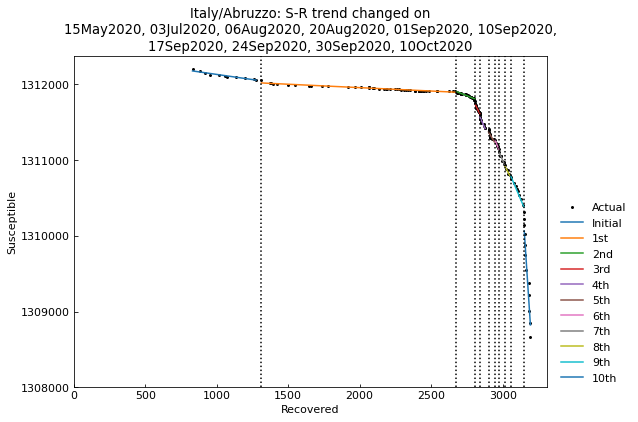


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 7th phase (04May2020 - 14May2020): finished  113 trials in 0 min 10 sec
	 8th phase (10Oct2020 - 20Oct2020): finished  110 trials in 0 min 10 sec
	 5th phase (20Aug2020 - 31Aug2020): finished 1649 trials in 3 min  1 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1448 trials in 3 min  1 sec
	 4th phase (15May2020 - 02Jul2020): finished 1440 trials in 3 min  2 sec
	 6th phase (17Sep2020 - 23Sep2020): finished  101 trials in 0 min 10 sec
	10th phase (03Jul2020 - 05Aug2020): finished 1616 trials in 3 min  1 sec
	 0th phase (10Sep2020 - 16Sep2020): finished  103 trials in 0 min 10 sec
	 1st phase (06Aug2020 - 19Aug2020): finished 1948 trials in 3 min  1 sec
	 2nd phase (24Sep2020 - 29Sep2020): finished 1778 trials in 3 min  1 sec
	 9th phase (01Sep2020 - 09Sep2020): finished 1941 trials in 3 min  1 sec
Completed optimization. Total: 6 min 24 sec
Now dealing with data of:  Puglia


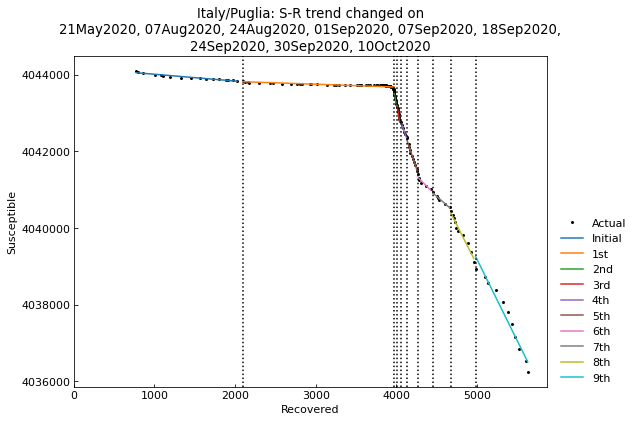


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (07Sep2020 - 17Sep2020): finished  105 trials in 0 min 10 sec
	 5th phase (24Aug2020 - 31Aug2020): finished 1598 trials in 3 min  1 sec
	 7th phase (07Aug2020 - 23Aug2020): finished 1577 trials in 3 min  1 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1391 trials in 3 min  2 sec
	 8th phase (01Sep2020 - 06Sep2020): finished 1406 trials in 3 min  1 sec
	 2nd phase (21May2020 - 06Aug2020): finished  113 trials in 0 min 10 sec
	 0th phase (24Sep2020 - 29Sep2020): finished  117 trials in 0 min 10 sec
	 9th phase (18Sep2020 - 23Sep2020): finished  112 trials in 0 min 10 sec
	 1st phase (04May2020 - 20May2020): finished 2165 trials in 3 min  1 sec
	 6th phase (10Oct2020 - 20Oct2020): finished 2193 trials in 3 min  1 sec
Completed optimization. Total: 6 min  3 sec
Now dealing with data of:  Toscana


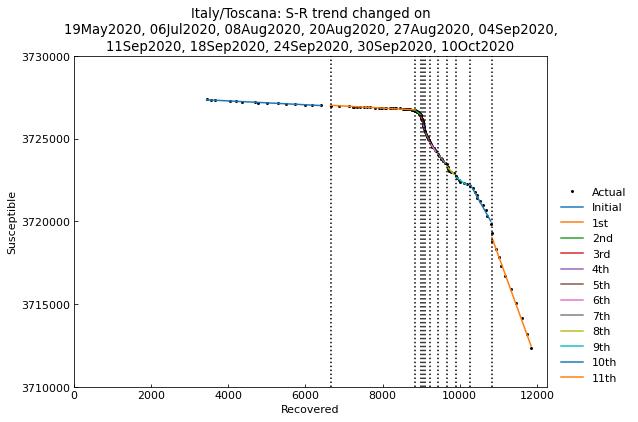


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (10Oct2020 - 20Oct2020): finished  106 trials in 0 min 10 sec
	11th phase (11Sep2020 - 17Sep2020): finished  111 trials in 0 min 10 sec
	 7th phase (08Aug2020 - 19Aug2020): finished  118 trials in 0 min 10 sec
	10th phase (04Sep2020 - 10Sep2020): finished  108 trials in 0 min 10 sec	 5th phase (27Aug2020 - 03Sep2020): finished  102 trials in 0 min 10 sec

	 8th phase (19May2020 - 05Jul2020): finished  105 trials in 0 min 10 sec
	 2nd phase (24Sep2020 - 29Sep2020): finished  118 trials in 0 min 10 sec
	 3rd phase (30Sep2020 - 09Oct2020): finished 1367 trials in 3 min  1 sec
	 1st phase (06Jul2020 - 07Aug2020): finished 1372 trials in 3 min  1 sec
	 6th phase (20Aug2020 - 26Aug2020): finished 1575 trials in 3 min  1 sec
	 0th phase (18Sep2020 - 23Sep2020): finished 1628 trials in 3 min  1 sec
	 9th phase (04May2020 - 18May2020): finished 2531 trials in 3 min  0 sec
Completed optimization. Total: 6 min  3

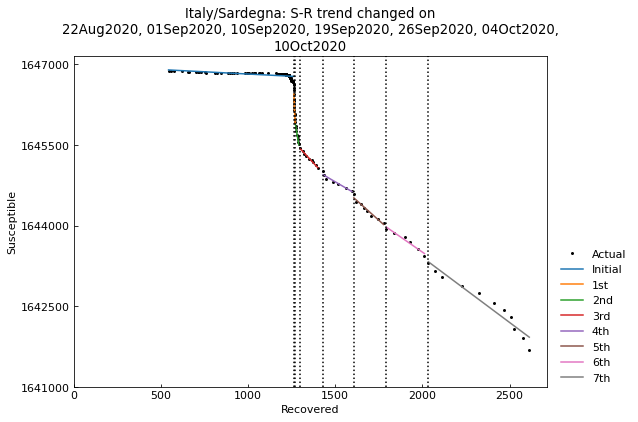


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (04Oct2020 - 09Oct2020): finished  100 trials in 0 min 10 sec
	 7th phase (10Sep2020 - 18Sep2020): finished  110 trials in 0 min 10 sec
	 1st phase (19Sep2020 - 25Sep2020): finished  107 trials in 0 min 10 sec
	 3rd phase (22Aug2020 - 31Aug2020): finished 1579 trials in 3 min  2 sec
	 5th phase (10Oct2020 - 20Oct2020): finished 1360 trials in 3 min  2 sec
	 6th phase (04May2020 - 21Aug2020): finished 1550 trials in 3 min  1 sec
	 0th phase (26Sep2020 - 03Oct2020): finished  144 trials in 0 min 10 sec
	 2nd phase (01Sep2020 - 09Sep2020): finished 1458 trials in 3 min  1 sec
Completed optimization. Total: 3 min 22 sec


In [14]:
#now use data for all the list of values
for i, scenario in enumerate(scenarios_list_SIRD):
    actual_province = province_dict.get(i)
    print("\nNow dealing with data of: ", actual_province)
    print("Step: ", i, "/", len(scenarios_list_SIRD))
    
    # Fix the first date of records
    scenario.first_date = "04May2020"
    # Fix the last date of records
    scenario.last_date = "20Oct2020"
    scenario.trend(set_phases=True)
    scenario.estimate(cs.SIRD)
    
    actual_filename = 'results/'+actual_province+'_SIRD.csv'
    csv_filenames_SIRD.append(actual_filename)
    scenario.summary().to_csv(actual_filename, index = False)

Let's create a list of dataframes for 
+ SIR
+ SIR-D

estimations of hyperparameters $\rho$ ($\beta$) and $\gamma$ ($\mu$) 

## SIR

In [35]:
import seaborn as sns

In [117]:
def GetKey(val, dictionary):
    for key, value in dictionary.items():
        if val == value:
            return key
    return -1

def plot_history_beta_from_list(list_dataframes, province_dict):
    
    fig, ax = plt.subplots(figsize = (20,10))
    
    for index,j in enumerate(list_dataframes):
        
        df = j.copy()
        df["Start"] = df["Start"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))
        df["End"]   = df["End"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))

        ts_list  = []
        rho_list = []

        for i,row in enumerate(df.iterrows()):
            time_series_list = pd.date_range(start=df.loc[:,"Start"][i],end=df.loc[:,"End"][i])

            for date in time_series_list:
                ts_list.append(date)
                rho_list.append(row[1].rho)

        new_df = pd.DataFrame([ts_list,rho_list]).T
        new_df.columns = ["Date", "beta"]
        ax.plot(new_df.Date, new_df.beta, label = province_dict.get(index))
        
    ax.set_xlabel("Date")
    ax.set_ylabel("beta")
    ax.legend()
    
    return



def plot_history_beta_select_from_list(list_dataframes, province_dict, which_to_be_plot):
    
    fig, ax = plt.subplots(figsize = (20,10))
    
    for single_plot in which_to_be_plot:
        if type(single_plot) == 'str':
            j = GetKey(single_plot, province_dict)
            df = list_dataframes[j].copy()
            label_region = single_plot
        else: 
            label_region = province_dict.get(single_plot)
            df = list_dataframes[single_plot].copy()
        
        df["Start"] = df["Start"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))
        df["End"]   = df["End"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))

        ts_list  = []
        rho_list = []

        for i,row in enumerate(df.iterrows()):
            time_series_list = pd.date_range(start=df.loc[:,"Start"][i],end=df.loc[:,"End"][i])

            for date in time_series_list:
                ts_list.append(date)
                rho_list.append(row[1].rho)

        new_df = pd.DataFrame([ts_list,rho_list]).T
        new_df.columns = ["Date", "beta"]
        ax.plot(new_df.Date, new_df.beta, label = label_region)
        
    ax.set_xlabel("Date")
    ax.set_ylabel("beta")
    ax.legend()
    
    return

In [119]:
SIR_df_list = []
for i, scenario in enumerate(scenarios_list_SIR):
    actual_province = province_dict.get(i)
    actual_filename = 'results/'+actual_province+'_SIR.csv'
    SIR_df_list.append(pd.read_csv(actual_filename))

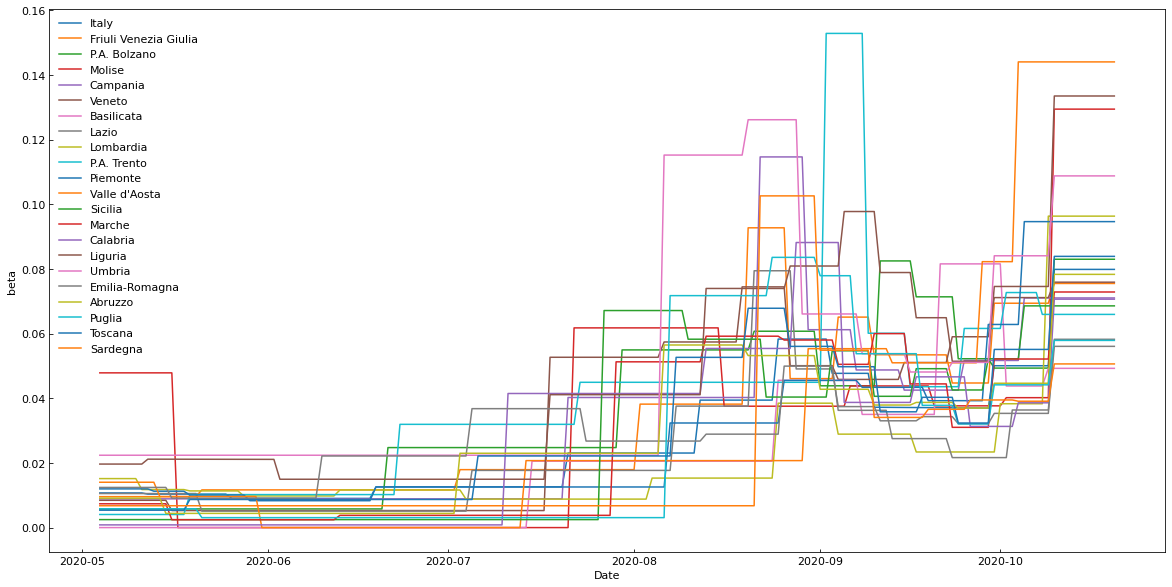

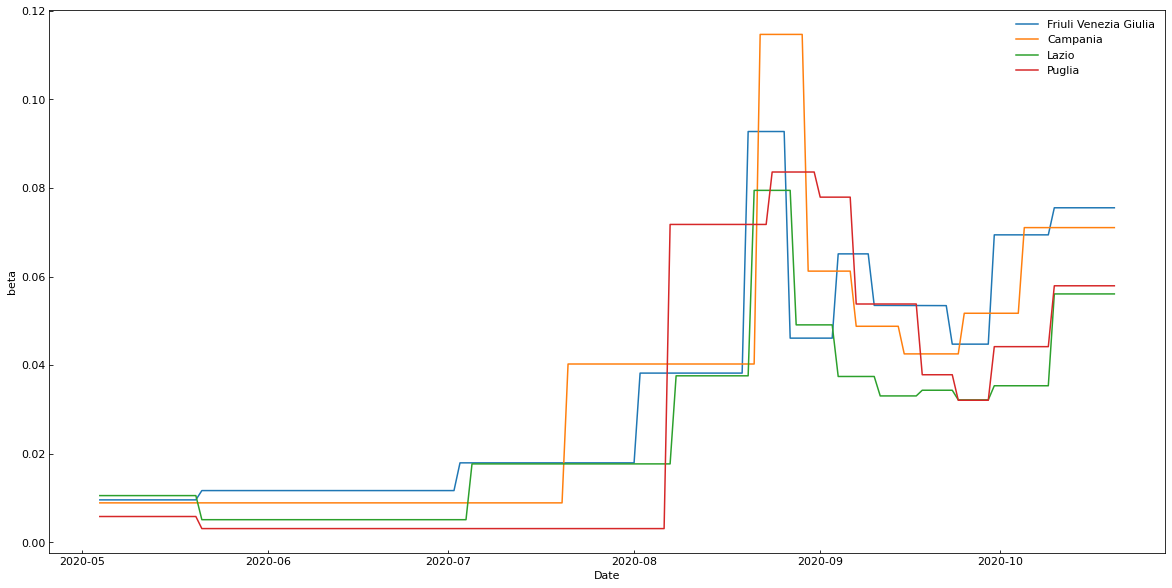

In [120]:
plot_history_beta_from_list(SIR_df_list, province_dict)
plot_history_beta_select_from_list(SIR_df_list, province_dict, [1,4,7,19])

In [121]:
SIR_df_list[14]

,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0,Past,04May2020,10Jul2020,1956687,SIR,0.01,0.000838,0.058828,1440,1193,16,0.160328,1525,3 min 1 sec
1,Past,11Jul2020,12Aug2020,1956687,SIR,11510.03,0.041487,0.000004,1440,24,277436,0.224536,1857,3 min 1 sec
2,Past,13Aug2020,27Aug2020,1956687,SIR,2.25,0.055420,0.024631,1440,18,40,0.032476,1569,3 min 1 sec
3,Past,28Aug2020,04Sep2020,1956687,SIR,8.65,0.088194,0.010199,1440,11,98,0.020010,1905,3 min 1 sec
4,Past,05Sep2020,16Sep2020,1956687,SIR,1.98,0.038729,0.019573,1440,25,51,0.020555,205,0 min 20 sec
5,Past,17Sep2020,25Sep2020,1956687,SIR,4.40,0.046636,0.010594,1440,21,94,0.015985,1788,3 min 1 sec
6,Past,26Sep2020,03Oct2020,1956687,SIR,1.68,0.031302,0.018647,1440,31,53,0.015608,125,0 min 10 sec
7,Past,04Oct2020,09Oct2020,1956687,SIR,1.63,0.038603,0.023611,1440,25,42,0.008930,1574,3 min 2 sec
8,Past,10Oct2020,20Oct2020,1956687,SIR,4.14,0.070664,0.017071,1440,14,58,0.020052,1583,3 min 1 sec


## SIR - D

In [123]:
SIRD_df_list = []
for i, scenario in enumerate(scenarios_list_SIRD):
    actual_province = province_dict.get(i)
    actual_filename = 'results/'+actual_province+'_SIR.csv'
    SIRD_df_list.append(pd.read_csv(actual_filename))
    

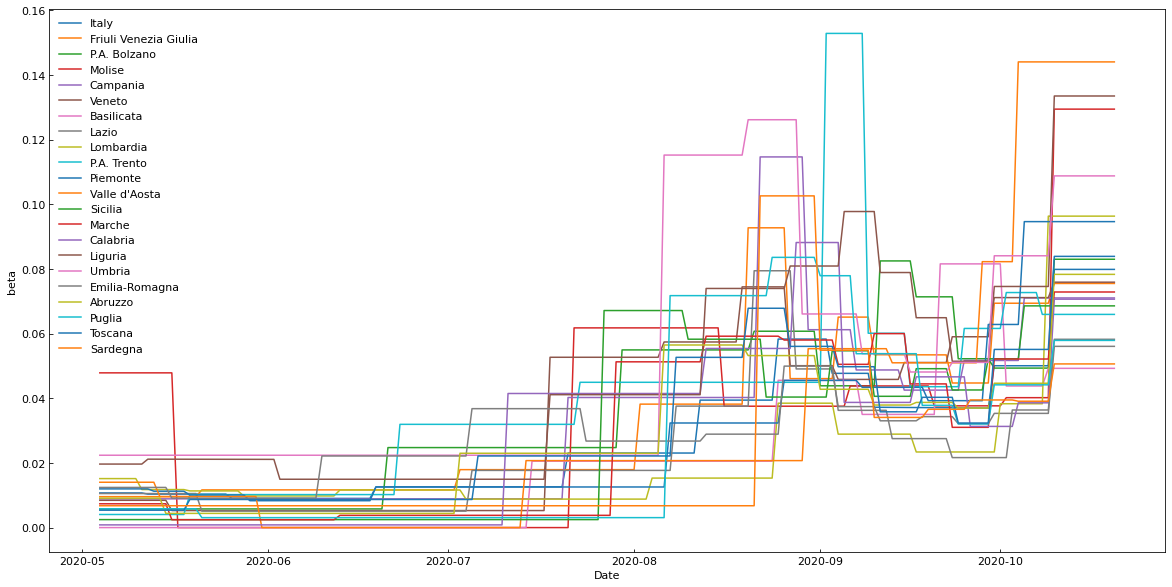

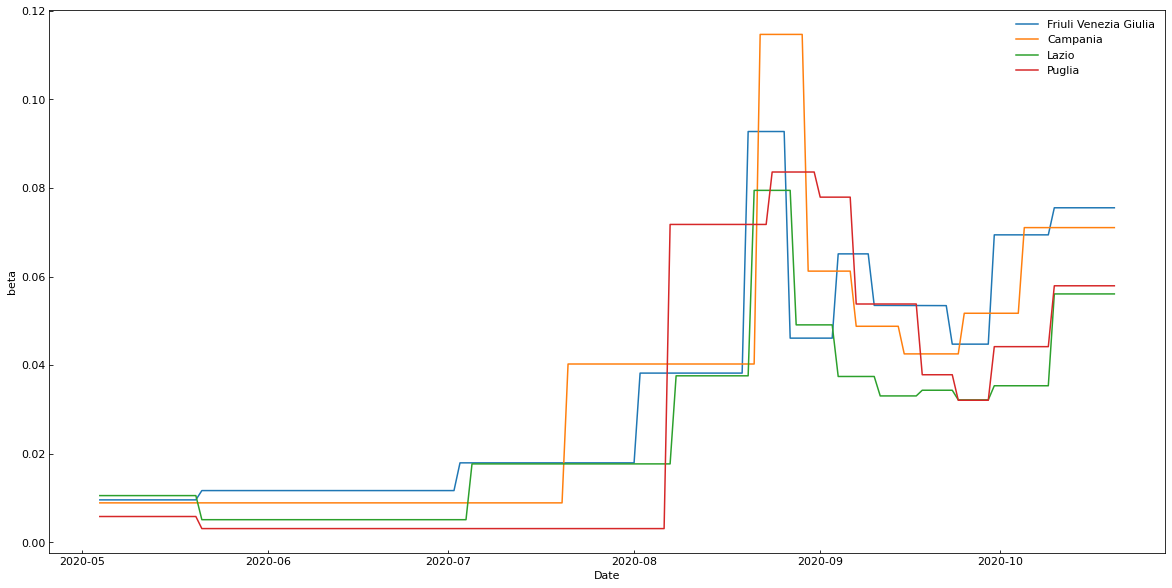

In [124]:
plot_history_beta_from_list(SIRD_df_list, province_dict)
plot_history_beta_select_from_list(SIRD_df_list, province_dict, [1,4,7,19])

In [125]:
SIRD_df_list[14]

,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0,Past,04May2020,10Jul2020,1956687,SIR,0.01,0.000838,0.058828,1440,1193,16,0.160328,1525,3 min 1 sec
1,Past,11Jul2020,12Aug2020,1956687,SIR,11510.03,0.041487,0.000004,1440,24,277436,0.224536,1857,3 min 1 sec
2,Past,13Aug2020,27Aug2020,1956687,SIR,2.25,0.055420,0.024631,1440,18,40,0.032476,1569,3 min 1 sec
3,Past,28Aug2020,04Sep2020,1956687,SIR,8.65,0.088194,0.010199,1440,11,98,0.020010,1905,3 min 1 sec
4,Past,05Sep2020,16Sep2020,1956687,SIR,1.98,0.038729,0.019573,1440,25,51,0.020555,205,0 min 20 sec
5,Past,17Sep2020,25Sep2020,1956687,SIR,4.40,0.046636,0.010594,1440,21,94,0.015985,1788,3 min 1 sec
6,Past,26Sep2020,03Oct2020,1956687,SIR,1.68,0.031302,0.018647,1440,31,53,0.015608,125,0 min 10 sec
7,Past,04Oct2020,09Oct2020,1956687,SIR,1.63,0.038603,0.023611,1440,25,42,0.008930,1574,3 min 2 sec
8,Past,10Oct2020,20Oct2020,1956687,SIR,4.14,0.070664,0.017071,1440,14,58,0.020052,1583,3 min 1 sec
